<a href="https://colab.research.google.com/github/D3sert650/SEM_Assignment_1/blob/main/SEM_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s disease - Inhibitory



Custom Accession: 9813a1d4-d107-459e-9b2e-7687be935f69 \

Sample: https://colab.research.google.com/drive/1TxSVMNm7DUwqbLs3lukT1_PQwGeKGbZi?usp=sharing \

URL: https://cellxgene.cziscience.com/collections/b953c942-f5d8-434f-9da7-e726ba7c1481Links

Website: https://app.bxgenomics.com/bxg/app/scrnaview/app_project_review.php?ID=919#Links



In [ ]:
!pip install cellxgene-census
!pip install scanpy
!pip install pandas_profiling
!pip install pydantic-settings
!pip install ydata-profiling
!pip install jupyter-contrib-nbextensions
!pip install scikit-learn
!pip install igraph
!pip install scvi-tools
!pip install scikit-misc
!pip install leidenalg


In [ ]:
import cellxgene_census
import scanpy
import tiledbsoma
from ydata_profiling import ProfileReport
import sys
import urllib
import pandas as pd
import numpy as np
from google.colab import sheets
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


#Task 1

In [ ]:
# Download Dataset
# cellxgene_census.download_source_h5ad("9813a1d4-d107-459e-9b2e-7687be935f69", to_path="inhibitory.h5ad")
adata = scanpy.read_h5ad("inhibitory.h5ad")

#Task 2

In [ ]:
# Load genes
urllib.request.urlretrieve("https://raw.githubusercontent.com/D3sert650/SEM_Assignment_1/refs/heads/main/data/differential_expression_AD_Normal.csv","differential_expression_AD_Normal.csv")
genes = pd.read_csv("differential_expression_AD_Normal.csv",comment="#")
genes.head()

#Map genes to name
lookup = dict(map(lambda i,j : (i,j), adata.var.index, adata.var['feature_name']))
reverse = dict((v, k) for k, v in lookup.items())

# import genes of interest
genes_of_interest = ["SLC26A3",
"RASGEF1B",
"RP11-701H24.9",
"LINGO1",
"PDE4DIP",
"AC159540.1",
"RP11-289H16.1",
"RP11-219A15.1",
"LINC01609",
"PHYHIP",
"RP11-745L13.2"]


# Bonus Task

RP11-289H16.1 -> ENSG0000022436, ENSG00000224363.2 #https://lncipedia.org/db/transcript/lnc-PPIAL4F-1:1

RP11-701H24.9 -> ENST00000557230, ENST00000551312  #http://r-loop.org/?transcript=ENST00000551312

AC159540.1 -> ENSG00000230606, ENST00000411738, ENST00000430893, ENSG00000237837 # https://www.bgee.org/search/genes?search=AC159540.1

RP11-219A15.1 -> ENSG00000266302, ENSG00000170160 #https://www.sigmaaldrich.com/US/en/product/sigma/ehu116081

RP11-745L13.2 -> ENSG00000251555 #https://www.bcgsc.ca/people/malachig/htdocs/alexa_platform/alexa_seq/MDS/genes/chr4_5/ENSG00000251555.htm


In [ ]:
lookup["ENSG0000022436"] = "RP11-289H16.1"
lookup["ENSG00000224363.2"] = "RP11-289H16.1"

lookup["ENST00000557230"] = "RP11-701H24.9"
lookup["ENST00000551312"] = "RP11-701H24.9"

lookup["ENSG00000230606"] = "AC159540.1"
lookup["ENST00000411738"] = "AC159540.1"
lookup["ENST00000430893"] = "AC159540.1"
lookup["ENSG00000237837"] = "AC159540.1"

lookup["ENSG00000266302"] = "RP11-219A15.1"
lookup["ENSG00000170160"] = "RP11-219A15.1"

lookup["ENSG00000251555"] = "RP11-745L13.2"


#General Analysis

In [ ]:
#generate report OBS
report = ProfileReport(obs)
report.to_file("Inhibitory_filtered.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 2 ... 3 5 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 2 ... 4 6 4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 1 3 1]' has dtype incom

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#generate report OBS
report = ProfileReport(adata.var)
report.to_file("Inhibitory_var.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# saving some stuff
# y = 1 if adata.obs['disease'] == "Alzheimer disease" else 0
adata.obs['Sample.ID'].unique()

['AD-MAP2-1', 'AD-MAP2-2', 'AD-MAP2-3', 'AD-MAP2-4', 'AD-MAP2-5', ..., 'CTRL-4', 'CTRL-5', 'CTRL-6', 'CTRL-7', 'CTRL-8']
Length: 24
Categories (24, object): ['AD-MAP2-1', 'AD-AT8-1', 'AD-MAP2-2', 'AD-AT8-2', ..., 'CTRL-5', 'CTRL-6',
                          'CTRL-7', 'CTRL-8']

In [ ]:
# Stuff I dont need to care about atm

drop_obs = ["tissue",
            "organism",          # unique human
            "cell_type",         # unique prefrontal
            "tissue_type",
            "suspension_type",   # unique cell
            "observation_joinid",# unique
            "organism_ontology_term_id",
            "tissue_ontology_term_id",
            "cell_type_ontology_term_id",
            "is_primary_data",   # constant true
            "sex_ontology_term_id", # identical to sex
            "self_reported_ethnicity_ontology_term_id", # to few samples
            "self_reported_ethnicity",    # to few samples
            "assay_ontology_term_id",    # identical to assay
            "disease_ontology_term_id",  # identical to disease
            "development_stage_ontology_term_id", #should reflect age but doesnt is identical to development_stage
]

drop_var = ["feature_is_filtered",
            "feature_biotype"]

obs = adata.obs.drop(columns=drop_obs)
var = adata.var.drop(columns=drop_var)

obs.head()
var.head()

feature_name feature_reference feature_length
ENSG00000278915  ENSG00000278915.1    NCBITaxon:9606            577
ENSG00000168454             TXNDC2    NCBITaxon:9606           3352
ENSG00000139180             NDUFA9    NCBITaxon:9606          10391
ENSG00000229177  ENSG00000229177.1    NCBITaxon:9606            327
ENSG00000204564           C6orf136    NCBITaxon:9606           2118

In [ ]:
#show all samples
obs.groupby("donor_id").sample(n=1)

# subject = "Subject1"
#show one sample
# obs.loc[obs.donor_id == subject]

# show cell types for one sample
# obs.loc[obs.donor_id == subject].value_counts(subset="Cell.Types")

#show one sample method
#obs.loc[(obs.donor_id == subject) & (obs.SORT == "AT8")]

#show cell type count for one person
# obs.loc[obs.donor_id == subject].value_counts(subset="Cell.Types")

#how many subjects
# obs.donor_id.unique().value_counts()



<ipython-input-10-439d91939294>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs.groupby("donor_id").sample(n=1)


nCount_RNA  nFeature_RNA  percent.mt         SORT  \
C0021_TGGACGCGTGCACGAA-1      2107.0          1458    3.417181  MAP2control   
C0027_CACATAGAGTGAATTG-1      2539.0          1673    0.236314  MAP2control   
C0028_AGAGCGAAGCTAACAA-1       624.0           522    0.000000  MAP2control   
C0034_TCGTACCTCTATCCCG-1      5758.0          2662    2.396666  MAP2control   
C0075_GCAGCCATCCGCTGTT-1     10437.0          3915    4.713998  MAP2control   
C0076_CACGGGTCATATACCG-1     12966.0          4652    4.303563  MAP2control   
C0077_TATCTGTTCAAAGGAT-1      5621.0          2633    2.188223  MAP2control   
C0078_ACGATCAGTTAGAAAC-1      5197.0          2318    5.657110  MAP2control   
C0013_ACGGGTCTCTTGACGA-1      1484.0           982    3.301887         MAP2   
C0009_TGATTTCCATCCGCGA-1     10947.0          4402    5.892025         MAP2   
C0012_TGGCCAGTCTGCGTAA-1      2968.0          1876    1.617251          AT8   
C0005_TACACGACAGATCCAT-1      1397.0           961    6.370795         MAP2   
C0007_CGCTTCAAGGTAGCTG-1      5968.0          3004    5.914879         MAP2   
C0001_GGAGCAAAGGGCTTGA-1      2627.0          1649    2.283974         MAP2   
C0015_TCCACACCATTGAGCT-1      2550.0          1624    1.843137         MAP2   
C0003_CAGCTGGCAAACGTGG-1      1087.0           763    3.403864         MAP2   

                          Amyloid Age  RIN  nCount_SCT  nFeature_SCT  \
C0021_TGGACGCGTGCACGAA-1       No  61  6.5      2623.0          1458   
C0027_CACATAGAGTGAATTG-1  DP (C0)  67  7.8      2749.0          1672   
C0028_AGAGCGAAGCTAACAA-1       No  87  7.5      2081.0           803   
C0034_TCGTACCTCTATCCCG-1       No  67  6.6      3979.0          2567   
C0075_GCAGCCATCCGCTGTT-1       No  72  6.4      7832.0          3854   
C0076_CACGGGTCATATACCG-1       No  66  7.1      7966.0          4260   
C0077_TATCTGTTCAAAGGAT-1       No  68  6.8      6295.0          2630   
C0078_ACGATCAGTTAGAAAC-1       No  71  6.5      6329.0          2317   
C0013_ACGGGTCTCTTGACGA-1       C3  93  6.5      2242.0           988   
C0009_TGATTTCCATCCGCGA-1       C3  79    7      2796.0          1664   
C0012_TGGCCAGTCTGCGTAA-1       C3  81  6.5      2925.0          1862   
C0005_TACACGACAGATCCAT-1       C3  57  6.8      2314.0           973   
C0007_CGCTTCAAGGTAGCTG-1       C3  81  6.1      3787.0          2679   
C0001_GGAGCAAAGGGCTTGA-1       C3  73  5.7      2659.0          1649   
C0015_TCCACACCATTGAGCT-1       C3  89  6.5      2608.0          1624   
C0003_CAGCTGGCAAACGTGG-1       C3  62  6.6      2337.0           817   

                          nCount_Exon  nFeature_Exon    PMI Braak  Sample.ID  \
C0021_TGGACGCGTGCACGAA-1       1247.0            979   19.5    II     CTRL-1   
C0027_CACATAGAGTGAATTG-1       1228.0            921   11.8    II     CTRL-2   
C0028_AGAGCGAAGCTAACAA-1        209.0            195    9.3    II     CTRL-3   
C0034_TCGTACCTCTATCCCG-1       3370.0           1727     33     0     CTRL-4   
C0075_GCAGCCATCCGCTGTT-1       3265.0           1924   16.4     I     CTRL-5   
C0076_CACGGGTCATATACCG-1       5273.0           2753  11.25     I     CTRL-6   
C0077_TATCTGTTCAAAGGAT-1       1948.0           1294  19.25    II     CTRL-7   
C0078_ACGATCAGTTAGAAAC-1       1456.0            876   24.9     0     CTRL-8   
C0013_ACGGGTCTCTTGACGA-1        642.0            442      4    VI  AD-MAP2-7   
C0009_TGATTTCCATCCGCGA-1       6418.0           3080   19.5    VI  AD-MAP2-5   
C0012_TGGCCAGTCTGCGTAA-1       1488.0           1040   15.8    VI   AD-AT8-6   
C0005_TACACGACAGATCCAT-1        697.0            487     14    VI  AD-MAP2-3   
C0007_CGCTTCAAGGTAGCTG-1       3808.0           2109     24    VI  AD-MAP2-4   
C0001_GGAGCAAAGGGCTTGA-1       1291.0            937     13    VI  AD-MAP2-1   
C0015_TCCACACCATTGAGCT-1       1380.0            926      1    VI  AD-MAP2-8   
C0003_CAGCTGGCAAACGTGG-1        531.0            388   10.9    VI  AD-MAP2-2   

                                     Cell.Types  donor_id      assay  \
C0021_TGGACGCGTGCACGAA-1

In [ ]:
obs.loc[obs.donor_id == "Subject1"]

In [ ]:
# split into subjects:
subjects = {}
subject_ids = obs.donor_id.unique()
for subject in subject_ids:
  subjects[subject] = obs.loc[obs.donor_id == subject]
subjects.keys()


# split into normal and AD
normal = obs.loc[obs.disease == "normal"]
ad = obs.loc[obs.disease == "Alzheimer disease"]

normal.reset_index(inplace=True)
ad.reset_index(inplace=True)

# first compare
normal.describe().compare(ad.describe())

nCount_RNA                nFeature_RNA                  percent.mt  \
               self         other          self         other          self   
count  11464.000000  11733.000000  11464.000000  11733.000000  11464.000000   
mean    5539.913555   3153.810449   2501.750000   1715.551607      3.484056   
std     3578.743099   2020.378250   1018.642753    825.937851      3.314981   
min      601.000000    602.000000    465.000000    401.000000           NaN   
25%     2873.000000   1613.000000   1712.750000   1056.000000      1.352492   
50%     4744.000000   2709.000000   2427.000000   1589.000000      2.582742   
75%     7377.000000   4170.000000   3209.000000   2225.000000      4.643058   
max    29487.000000  20080.000000   6109.000000   6139.000000     37.640872   

                       nCount_SCT                nFeature_SCT                \
              other          self         other          self         other   
count  11733.000000  11464.000000  11733.000000  11464.000000  11733.000000   
mean       3.952495   5244.070569   2827.813688   2457.156839   1604.223984   
std        3.720789   1955.487888    556.171348    844.331619    598.860005   
min             NaN   2019.000000   1771.000000    747.000000    573.000000   
25%        1.643836   3310.750000   2323.000000   1811.000000   1058.000000   
50%        2.912333   6063.500000   2701.000000   2406.000000   1574.000000   
75%        4.956268   7034.000000   3388.000000   3092.000000   2119.000000   
max       39.079380   8274.000000   3900.000000   4683.000000   2994.000000   

        nCount_Exon               nFeature_Exon                
               self         other          self         other  
count  11464.000000  11733.000000  11464.000000  11733.000000  
mean    2101.615754   1588.501832   1313.461706    969.747805  
std     1280.547140   1160.269693    640.270448    575.972208  
min      183.000000    201.000000    144.000000    158.000000  
25%     1201.000000    759.000000    840.000000    532.000000  
50%     1821.000000   1289.000000   1222.000000    840.000000  
75%     2683.250000   2061.000000   1696.000000   1268.000000  
max    12723.000000   9226.000000   4280.000000   3909.000000

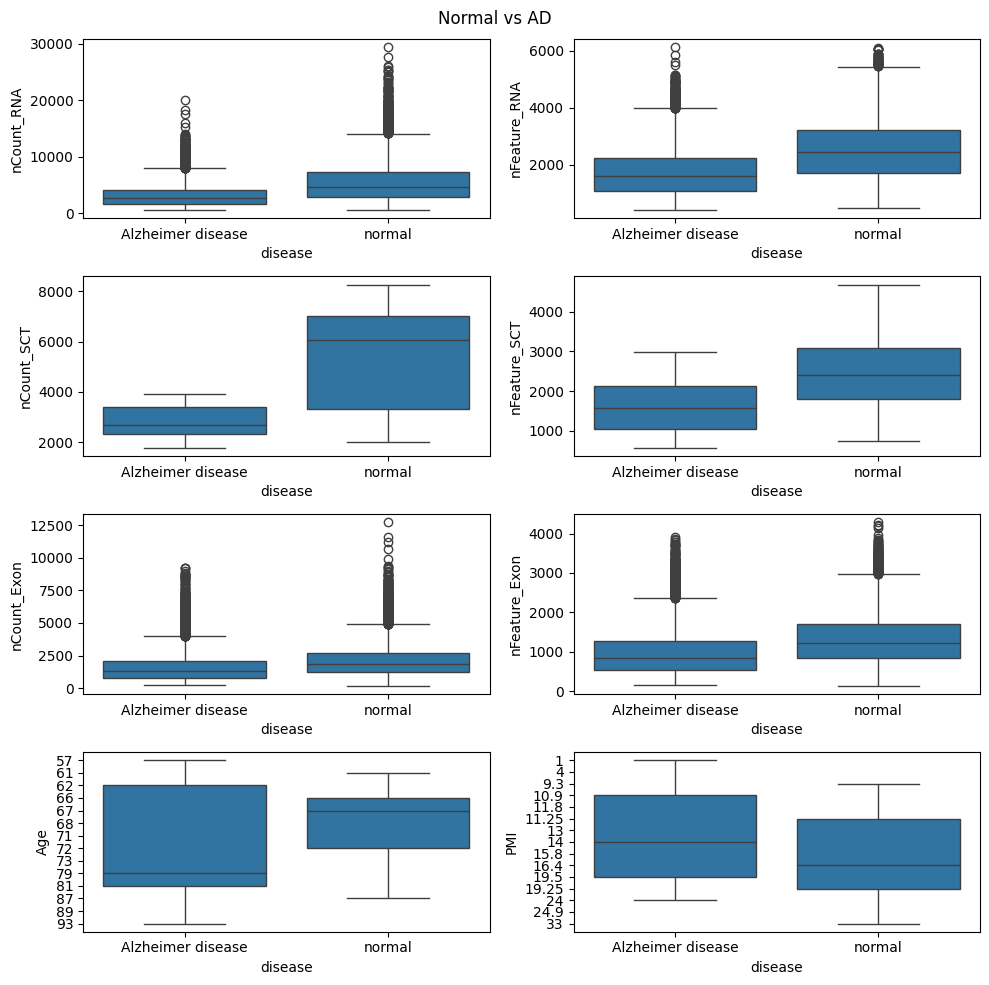

In [ ]:
# Plotting AD vs Normal
fig, axs = plt.subplots(4,2, figsize=(10,10))
fig.suptitle('Normal vs AD')
sns.boxplot(ax=axs[0,0],x="disease", y="nCount_RNA", data=obs)
sns.boxplot(ax=axs[0,1],x="disease", y="nFeature_RNA", data=obs)

sns.boxplot(ax=axs[1,0],x="disease", y="nCount_SCT", data=obs)
sns.boxplot(ax=axs[1,1],x="disease", y="nFeature_SCT", data=obs)

sns.boxplot(ax=axs[2,0],x="disease", y="nCount_Exon", data=obs)
sns.boxplot(ax=axs[2,1],x="disease", y="nFeature_Exon", data=obs)

sns.boxplot(ax=axs[3,0],x="disease", y="Age", data=obs)
sns.boxplot(ax=axs[3,1],x="disease", y="PMI", data=obs)
plt.tight_layout()

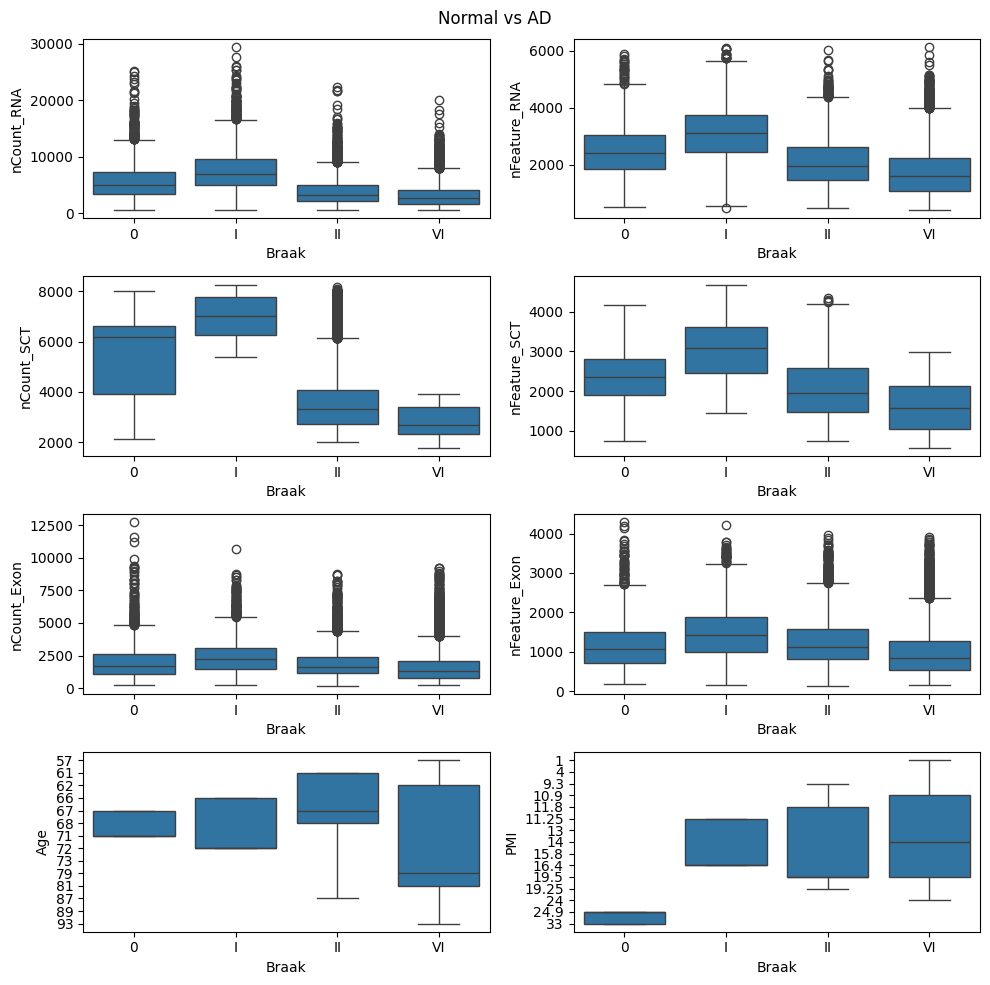

In [ ]:
# Plotting AD Stage
fig, axs = plt.subplots(4,2, figsize=(10,10))
fig.suptitle('Normal vs AD')
sns.boxplot(ax=axs[0,0],x="Braak", y="nCount_RNA", data=obs)
sns.boxplot(ax=axs[0,1],x="Braak", y="nFeature_RNA", data=obs)

sns.boxplot(ax=axs[1,0],x="Braak", y="nCount_SCT", data=obs)
sns.boxplot(ax=axs[1,1],x="Braak", y="nFeature_SCT", data=obs)

sns.boxplot(ax=axs[2,0],x="Braak", y="nCount_Exon", data=obs)
sns.boxplot(ax=axs[2,1],x="Braak", y="nFeature_Exon", data=obs)

sns.boxplot(ax=axs[3,0],x="Braak", y="Age", data=obs)
sns.boxplot(ax=axs[3,1],x="Braak", y="PMI", data=obs)
plt.tight_layout()

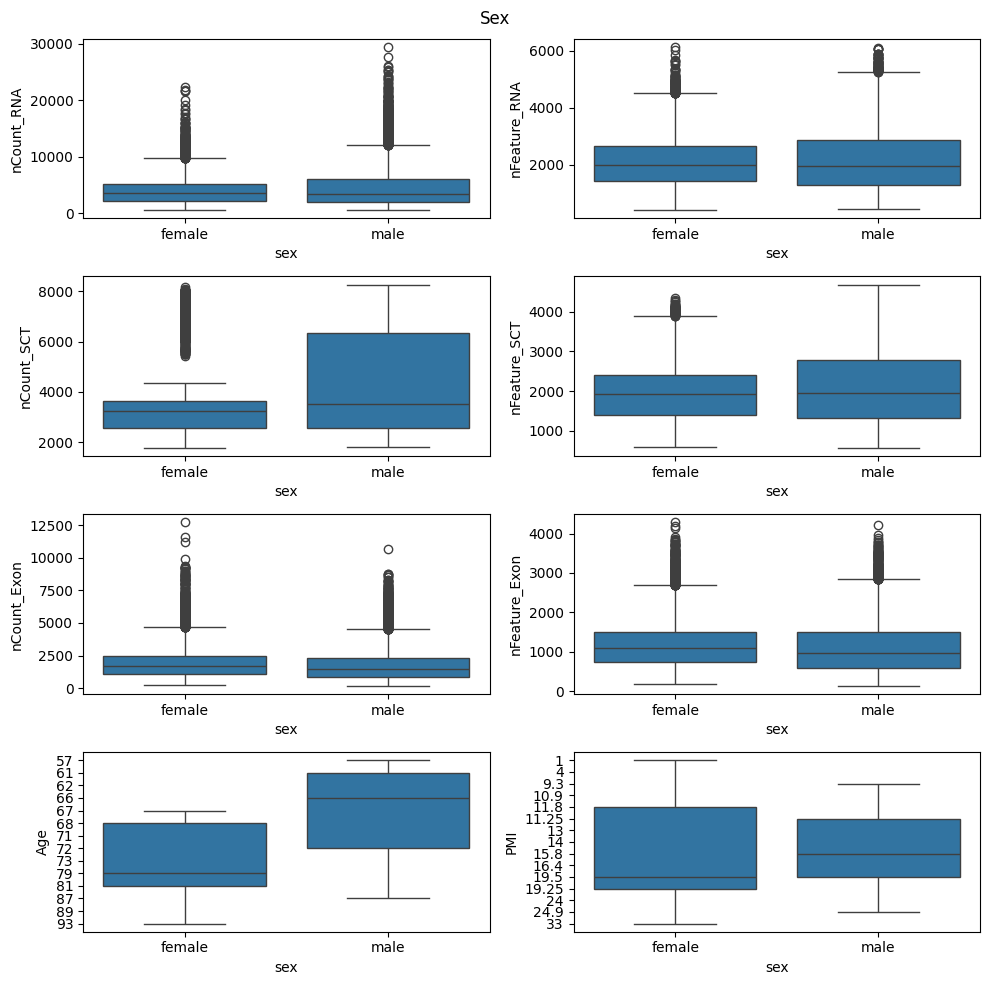

In [ ]:
# Plotting Sex
fig, axs = plt.subplots(4,2, figsize=(10,10))
fig.suptitle('Sex')
sns.boxplot(ax=axs[0,0],x="sex", y="nCount_RNA", data=obs)
sns.boxplot(ax=axs[0,1],x="sex", y="nFeature_RNA", data=obs)

sns.boxplot(ax=axs[1,0],x="sex", y="nCount_SCT", data=obs)
sns.boxplot(ax=axs[1,1],x="sex", y="nFeature_SCT", data=obs)

sns.boxplot(ax=axs[2,0],x="sex", y="nCount_Exon", data=obs)
sns.boxplot(ax=axs[2,1],x="sex", y="nFeature_Exon", data=obs)

#sns.boxplot(ax=axs[3,0],x="sex", y="Age", data=obs)
sns.boxplot(ax=axs[3,1],x="sex", y="PMI", data=obs)
plt.tight_layout()

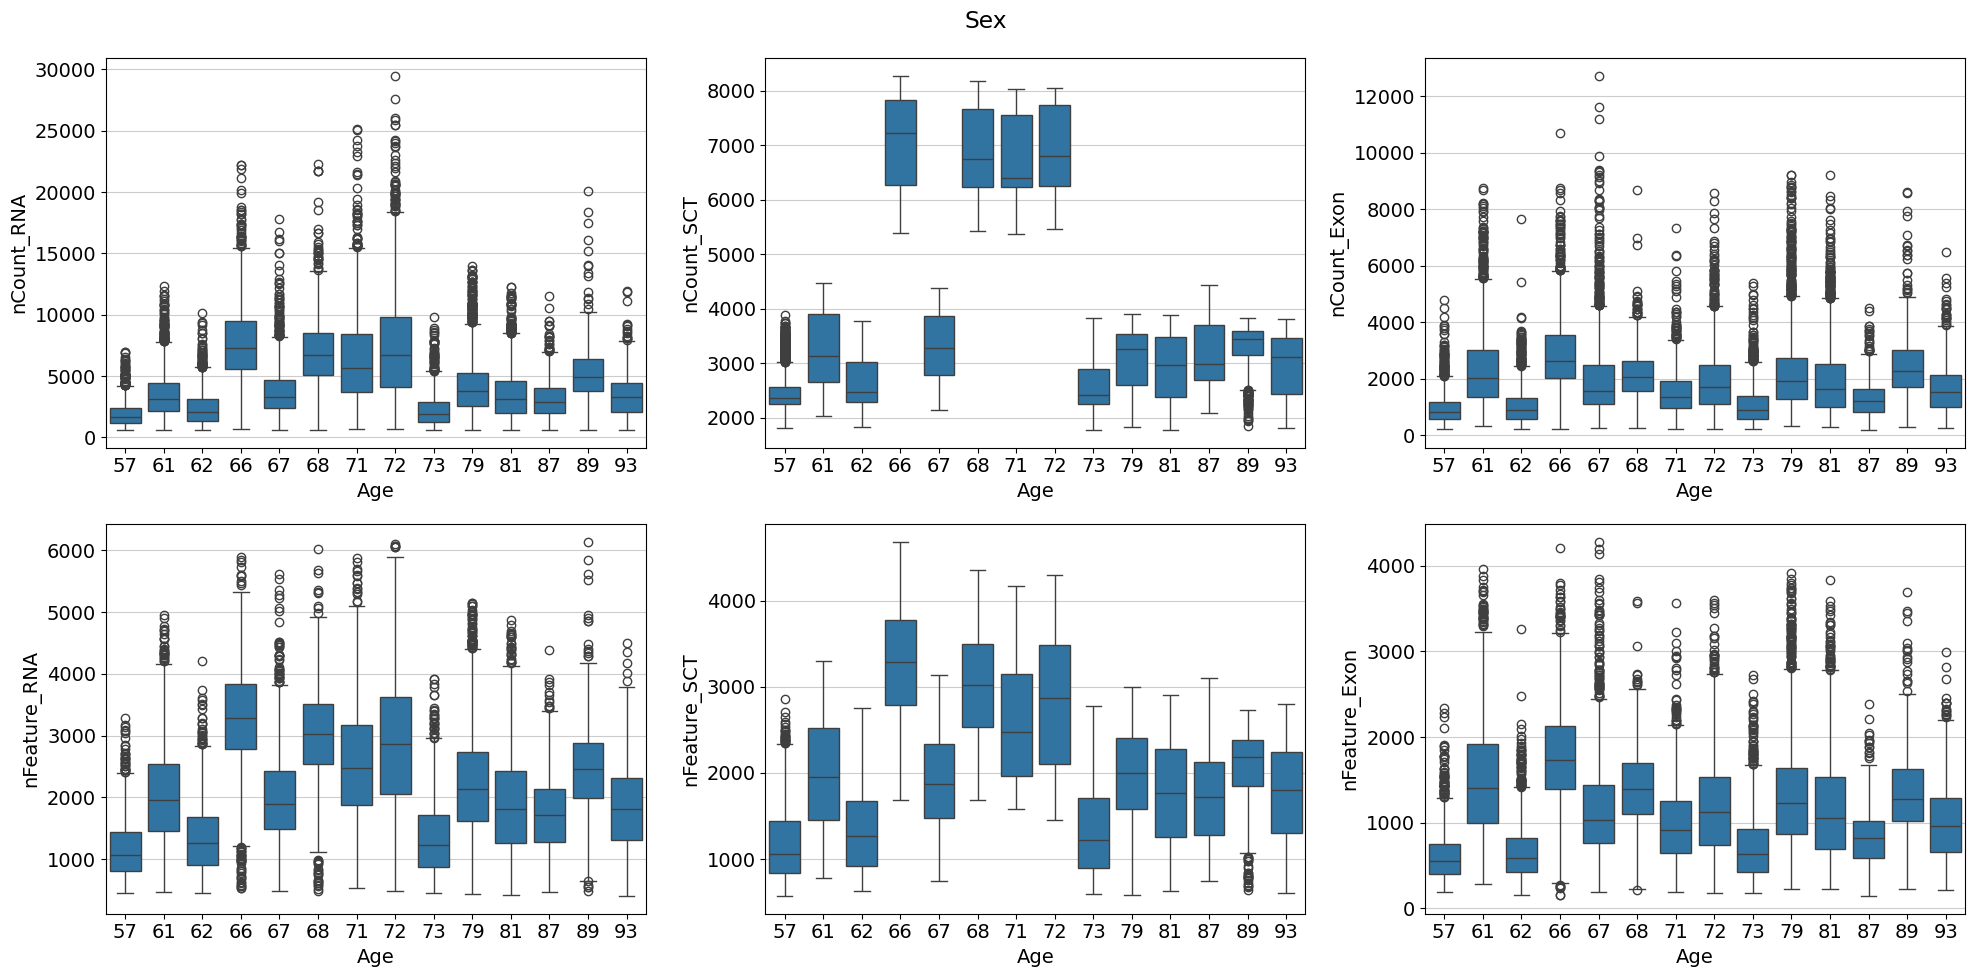

In [ ]:
# Plotting Age
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.suptitle('Sex')
sns.boxplot(ax=axs[0,0],x="Age", y="nCount_RNA", data=obs)
sns.boxplot(ax=axs[1,0],x="Age", y="nFeature_RNA", data=obs)

sns.boxplot(ax=axs[0,1],x="Age", y="nCount_SCT", data=obs)
sns.boxplot(ax=axs[1,1],x="Age", y="nFeature_SCT", data=obs)

sns.boxplot(ax=axs[0,2],x="Age", y="nCount_Exon", data=obs)
sns.boxplot(ax=axs[1,2],x="Age", y="nFeature_Exon", data=obs)

#sns.boxplot(ax=axs[3,0],x="sex", y="Age", data=obs)
#sns.boxplot(ax=axs[3,1],x="Age", y="PMI", data=obs)
plt.tight_layout()

In [ ]:
# GOT AN IDEA

print(adata.obs.shape)
print(adata.var.shape)
print(adata.X.shape)

# https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/5.0.0/schema.md
adata.layers["log_transformed"] = np.log1p(adata.X)
groundbreaking = adata.to_df(layer="log_transformed")

# OKKKK so obs and var are rows and cols and X is the actual data for each cell.
# So we can see which cell contains which gene!!!!!!!

(23197, 36)
(33091, 5)
(23197, 33091)


In [ ]:
t = t[t>0]
t.index = t.index.map(lookup)


In [ ]:
t

SLC26A3    1.243301
SH3GL3     1.243301
SIK2       1.243301
DNAJC3     1.243301
CNTNAP2    1.505727
             ...   
RGS7BP     1.243301
NCKAP1     1.243301
CLASP1     1.243301
PIAS4      1.243301
SYT16      1.415086
Name: C0001_AAACGGGCAGTACACT-1, Length: 690, dtype: float32

In [ ]:
subject = "Subject1"
bdata = adata[adata.obs.donor_id == subject]

#obs.loc[obs.donor_id == subject].index

bdata.obs = bdata.obs.loc[obs.donor_id == subject]
bdata.layers["log_transformed"] = np.log1p(bdata.X)
tmp = bdata.to_df(layer="log_transformed")
tmp.loc[:, (tmp != 0).any(axis=0)]
tmp.columns = tmp.columns.map(lookup)
tmp

ENSG00000278915.1  TXNDC2  NDUFA9  \
C0013_AAACCTGAGGTCATCT-1                0.0     0.0     0.0   
C0013_AAACCTGCATGTCGAT-1                0.0     0.0     0.0   
C0013_AAACGGGCAAGACACG-1                0.0     0.0     0.0   
C0013_AAACGGGCATCTACGA-1                0.0     0.0     0.0   
C0013_AAACGGGTCGCCCTTA-1                0.0     0.0     0.0   
...                                     ...     ...     ...   
C0014_TGCCCTATCCCTTGCA-1                0.0     0.0     0.0   
C0014_TGCTACCTCATGCTCC-1                0.0     0.0     0.0   
C0014_TGGGCGTTCCTACAGA-1                0.0     0.0     0.0   
C0014_TTCGAAGAGTCAAGGC-1                0.0     0.0     0.0   
C0014_TTGACTTGTTAGTGGG-1                0.0     0.0     0.0   

                          ENSG00000229177.1  C6orf136   GADD45A  SPON1-AS1  \
C0013_AAACCTGAGGTCATCT-1                0.0  0.000000  0.000000        0.0   
C0013_AAACCTGCATGTCGAT-1                0.0  0.643829  0.000000        0.0   
C0013_AAACGGGCAAGACACG-1                0.0  0.000000  0.000000        0.0   
C0013_AAACGGGCATCTACGA-1                0.0  0.000000  0.000000        0.0   
C0013_AAACGGGTCGCCCTTA-1                0.0  0.595881  0.000000        0.0   
...                                     ...       ...       ...        ...   
C0014_TGCCCTATCCCTTGCA-1                0.0  0.000000  0.000000        0.0   
C0014_TGCTACCTCATGCTCC-1                0.0  0.000000  1.156113        0.0   
C0014_TGGGCGTTCCTACAGA-1                0.0  0.000000  0.000000        0.0   
C0014_TTCGAAGAGTCAAGGC-1                0.0  0.000000  0.000000        0.0   
C0014_TTGACTTGTTAGTGGG-1                0.0  0.000000  0.000000        0.0   

                          EFCC1  ENSG00000257894.2  TMEM207  ...  CLCC1  \
C0013_AAACCTGAGGTCATCT-1    0.0           0.000000      0.0  ...    0.0   
C0013_AAACCTGCATGTCGAT-1    0.0           0.643829      0.0  ...    0.0   
C0013_AAACGGGCAAGACACG-1    0.0           0.000000      0.0  ...    0.0   
C0013_AAACGGGCATCTACGA-1    0.0           0.831083      0.0  ...    0.0   
C0013_AAACGGGTCGCCCTTA-1    0.0           0.595881      0.0  ...    0.0   
...                         ...                ...      ...  ...    ...   
C0014_TGCCCTATCCCTTGCA-1    0.0           0.000000      0.0  ...    0.0   
C0014_TGCTACCTCATGCTCC-1    0.0           0.000000      0.0  ...    0.0   
C0014_TGGGCGTTCCTACAGA-1    0.0           0.000000      0.0  ...    0.0   
C0014_TTCGAAGAGTCAAGGC-1    0.0           0.000000      0.0  ...    0.0   
C0014_TTGACTTGTTAGTGGG-1    0.0           0.000000      0.0  ...    0.0   

                          ENSG00000261555.1  MICB  TMEM51-AS1  LINC01999  \
C0013_AAACCTGAGGTCATCT-1                0.0   0.0         0.0        0.0   
C0013_AAACCTGCATGTCGAT-1                0.0   0.0         0.0        0.0   
C0013_AAACGGGCAAGACACG-1                0.0   0.0         0.0        0.0   
C0013_AAACGGGCATCTACGA-1                0.0   0.0         0.0        0.0   
C0013_AAACGGGTCGCCCTTA-1                0.0   0.0         0.0        0.0   
...                                     ...   ...         ...        ...   
C0014_TGCCCTATCCCTTGCA-1                0.0   0.0         0.0        0.0   
C0014_TGCTACCTCATGCTCC-1                0.0   0.0         0.0        0.0   
C0014_TGGGCGTTCCTACAGA-1                0.0   0.0         0.0        0.0   
C0014_TTCGAAGAGTCAAGGC-1                0.0   0.0         0.0        0.0   
C0014_TTGACTTGTTAGTGGG-1                0.0   0.0         0.0        0.0   

                            CCDC12  ENSG00000272264.1    RUVBL1     DIP2B  \
C0013_AAACCTGAGGTCATCT-1  0.000000                0.0  0.000000  1.041463   
C0013_AAACCTGCATGTCGAT-1  0.000000                0.0  0.000000  0.000000   
C0013_AAACGGGCAAGACACG-1  0.000000                0.0  0.908607  0.000000   
C0013_AAACGGGCATCTACGA-1  0.000000                0.0  0.000000  0.000000   
C0013_AAACGGGTCGCCCTTA-1  0.595881                0.0  0.000000  0.000000   
...                            ...                ...   

<Axes: >

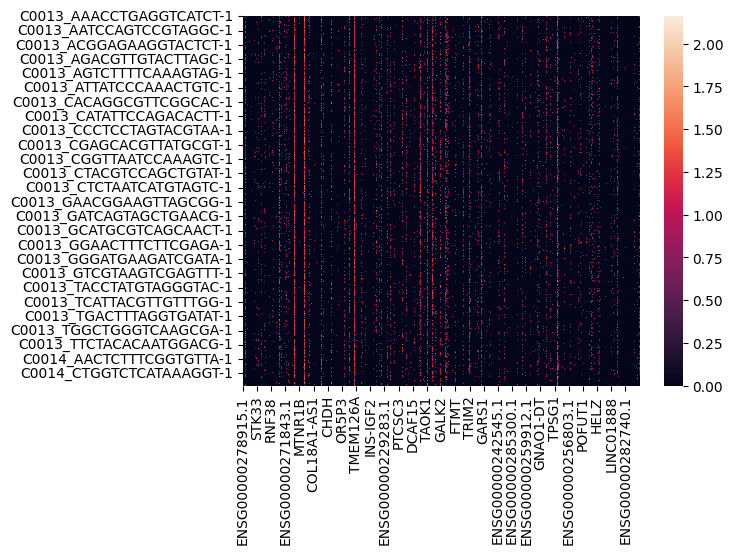

In [ ]:
# Heatmap for Subject 1
sns.heatmap(tmp,)

<Axes: >

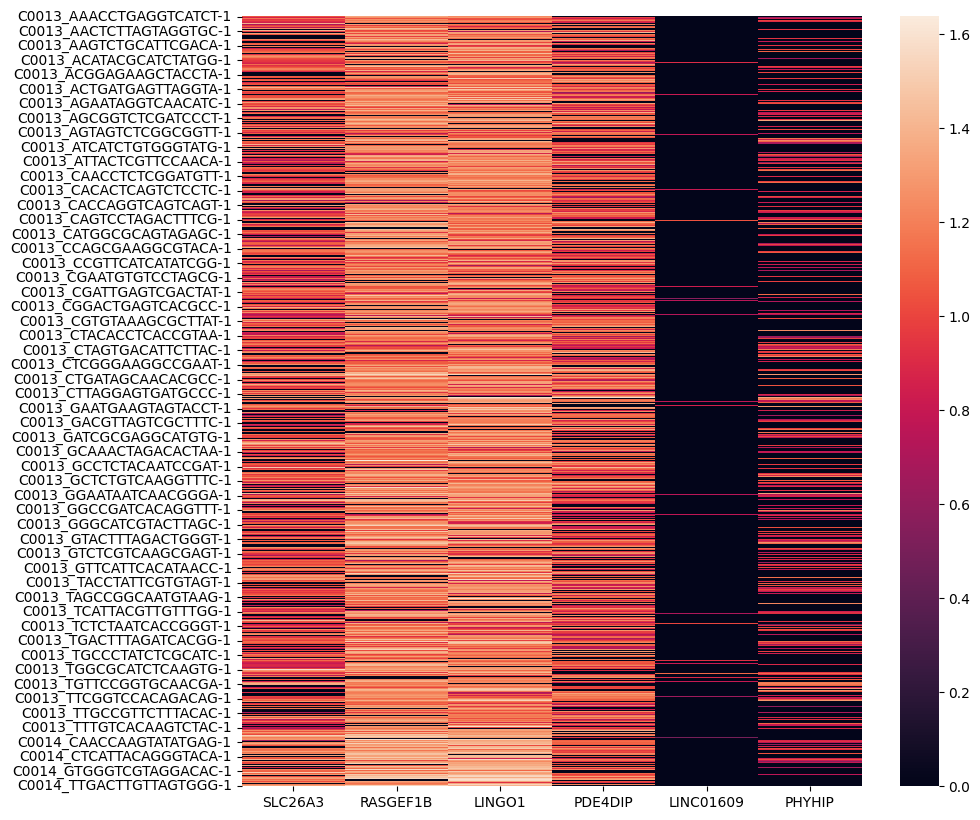

In [ ]:
#Heatmap with only genes that were mentioned by the Prof
genes_of_interest_map = tmp.filter(genes_of_interest)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(genes_of_interest_map,ax=ax)
# is this what the umap represents???????????
# is this what a single point is? is this the high dimensionality of the data?

In [ ]:
#bdata.to_df(layer="log_transformed")
obs
# filter by cell type
#

nCount_RNA  nFeature_RNA  percent.mt         SORT  \
C0001_AAACGGGCAGTACACT-1       927.0           694    1.833873         MAP2   
C0001_AAACGGGGTACCGTAT-1      1251.0           886    6.474820         MAP2   
C0001_AAACGGGTCCAGAGGA-1      2972.0          1695    0.201884         MAP2   
C0001_AAACGGGTCCTTCAAT-1      3619.0          1875    2.459243         MAP2   
C0001_AAAGATGGTCAACATC-1      3931.0          2247    2.467566         MAP2   
...                              ...           ...         ...          ...   
C0078_TTTGATCGTATGGAGC-1      4433.0          2369    1.308369  MAP2control   
C0078_TTTGGAGCATGCTGCG-1      7850.0          3063    6.369427  MAP2control   
C0078_TTTGGAGCATTCACCC-1      5511.0          2269    6.060606  MAP2control   
C0078_TTTGGTTTCCGAAATC-1      9837.0          3440    3.151367  MAP2control   
C0078_TTTGGTTTCTCGTGAA-1      6275.0          2510    1.561753  MAP2control   

                         Amyloid Age  RIN  nCount_SCT  nFeature_SCT  \
C0001_AAACGGGCAGTACACT-1      C3  73  5.7      2092.0           787   
C0001_AAACGGGGTACCGTAT-1      C3  73  5.7      2440.0           915   
C0001_AAACGGGTCCAGAGGA-1      C3  73  5.7      2949.0          1695   
C0001_AAACGGGTCCTTCAAT-1      C3  73  5.7      3269.0          1873   
C0001_AAAGATGGTCAACATC-1      C3  73  5.7      3441.0          2246   
...                          ...  ..  ...         ...           ...   
C0078_TTTGATCGTATGGAGC-1      No  71  6.5      6116.0          2389   
C0078_TTTGGAGCATGCTGCG-1      No  71  6.5      7434.0          3062   
C0078_TTTGGAGCATTCACCC-1      No  71  6.5      6401.0          2269   
C0078_TTTGGTTTCCGAAATC-1      No  71  6.5      7749.0          3419   
C0078_TTTGGTTTCTCGTGAA-1      No  71  6.5      6591.0          2509   

                          nCount_Exon  nFeature_Exon   PMI Braak  Sample.ID  \
C0001_AAACGGGCAGTACACT-1        344.0            296    13    VI  AD-MAP2-1   
C0001_AAACGGGGTACCGTAT-1        598.0            463    13    VI  AD-MAP2-1   
C0001_AAACGGGTCCAGAGGA-1        968.0            725    13    VI  AD-MAP2-1   
C0001_AAACGGGTCCTTCAAT-1       1442.0            920    13    VI  AD-MAP2-1   
C0001_AAAGATGGTCAACATC-1       1753.0           1262    13    VI  AD-MAP2-1   
...                               ...            ...   ...   ...        ...   
C0078_TTTGATCGTATGGAGC-1       1224.0            954  24.9     0     CTRL-8   
C0078_TTTGGAGCATGCTGCG-1       2240.0           1281  24.9     0     CTRL-8   
C0078_TTTGGAGCATTCACCC-1       1363.0            818  24.9     0     CTRL-8   
C0078_TTTGGTTTCCGAAATC-1       2271.0           1398  24.9     0     CTRL-8   
C0078_TTTGGTTTCTCGTGAA-1       1188.0            852  24.9     0     CTRL-8   

                                Cell.Types  donor_id      assay  \
C0001_AAACGGGCAGTACACT-1  In7_ADARB2-CALB2  Subject6  10x 3' v2   
C0001_AAACGGGGTACCGTAT-1  In6_ADARB2-LAMP5  Subject6  10x 3' v2   
C0001_AAACGGGTCCAGAGGA-1    In1_LHX6-PVALB  Subject6  10x 3' v2   
C0001_AAACGGGTCCTTCAAT-1  In6_ADARB2-LAMP5  Subject6  10x 3' v2   
C0001_AAAGATGGTCAACATC-1  In6_ADARB2-LAMP5  Subject6  10x 3' v2   
...                                    ...       ...        ...   
C0078_TTTGATCGTATGGAGC-1  In7_ADARB2-CALB2    CTRL-8  10x 3' v3   
C0078_TTTGGAGCATGCTGCG-1    In1_LHX6-PVALB    CTRL-8  10x 3' v3   
C0078_TTTGGAGCATTCACCC-1    In1_LHX6-PVALB    CTRL-8  10x 3' v3   
C0078_TTTGGTTTCCGAAATC-1    In1_LHX6-PVALB    CTRL-8  10x 3' v3   
C0078_TTTGGTTTCTCGTGAA-1    In1_LHX6-PVALB    CTRL-8  10x 3' v3   

                                    disease     sex        development_stage  
C0001_AAACGGGCAGTACACT-1  Alzheimer disease  female  73-year-old human stage  
C0001_AAACGGGGTACCGTAT-1  Alzheimer disease  female  73-year-old human stage  
C0001_AAACGGGTCCAGAGGA-1  Alzheimer disease  female  73-year-old human stage  
C0001_AAACGGGTCCTTCAAT-1  Alzheimer disease  female  73-year-old human stage  
C0001_AAAGATGGTCAACATC-1  Alzheimer disease  female  73-year-old human stag

In [ ]:
pd.DataFrame(adata.obsm['X_umap']) # WHAT IS THIS OMG

0          1
0      -1.454214  -9.406294
1     -11.071024  -1.892330
2       3.433396   1.669855
3     -11.056104  -1.408620
4     -10.265755  -1.589684
...          ...        ...
23192   1.377094 -10.151915
23193   1.542023   8.192843
23194   1.433809   4.961167
23195   2.286798   5.646764
23196   0.963780   6.355576

[23197 rows x 2 columns]

In [ ]:
# create cellxgene matrix for each subject
subjects_cellxgene = {}

for subject in adata.obs.donor_id.unique():
  xdata = adata[adata.obs.donor_id == subject]
  xdata.layers["log_transformed"] = np.log1p(xdata.X)
  df = xdata.to_df(layer="log_transformed")
  df.columns = df.columns.map(lookup)
  subjects_cellxgene[subject] = df


<ipython-input-10-b2a4e5a2cc3c>:6: ImplicitModificationWarning: Setting element `.layers['log_transformed']` of view, initializing view as actual.
  xdata.layers["log_transformed"] = np.log1p(xdata.X)
<ipython-input-10-b2a4e5a2cc3c>:6: ImplicitModificationWarning: Setting element `.layers['log_transformed']` of view, initializing view as actual.
  xdata.layers["log_transformed"] = np.log1p(xdata.X)
<ipython-input-10-b2a4e5a2cc3c>:6: ImplicitModificationWarning: Setting element `.layers['log_transformed']` of view, initializing view as actual.
  xdata.layers["log_transformed"] = np.log1p(xdata.X)
<ipython-input-10-b2a4e5a2cc3c>:6: ImplicitModificationWarning: Setting element `.layers['log_transformed']` of view, initializing view as actual.
  xdata.layers["log_transformed"] = np.log1p(xdata.X)
<ipython-input-10-b2a4e5a2cc3c>:6: ImplicitModificationWarning: Setting element `.layers['log_transformed']` of view, initializing view as actual.
  xdata.layers["log_transformed"] = np.log1p(xdat

In [ ]:
print(subjects_cellxgene.keys())
subjects_cellxgene['CTRL-1']#.to_numpy()

dict_keys(['Subject6', 'Subject8', 'Subject4', 'Subject5', 'Subject2', 'Subject3', 'Subject1', 'Subject7', 'CTRL-1', 'CTRL-2', 'CTRL-3', 'CTRL-4', 'CTRL-5', 'CTRL-6', 'CTRL-7', 'CTRL-8'])


ENSG00000278915.1  TXNDC2  NDUFA9  \
C0021_AAACCTGAGAATAGGG-1                0.0     0.0     0.0   
C0021_AAACCTGAGCGACGTA-1                0.0     0.0     0.0   
C0021_AAACCTGCAAGGACAC-1                0.0     0.0     0.0   
C0021_AAACCTGCACATGGGA-1                0.0     0.0     0.0   
C0021_AAACCTGCACTATCTT-1                0.0     0.0     0.0   
...                                     ...     ...     ...   
C0021_TTTGTCAAGCACAGGT-1                0.0     0.0     0.0   
C0021_TTTGTCAAGCGATTCT-1                0.0     0.0     0.0   
C0021_TTTGTCAGTCTCCACT-1                0.0     0.0     0.0   
C0021_TTTGTCAGTGGCCCTA-1                0.0     0.0     0.0   
C0021_TTTGTCATCGCCAAAT-1                0.0     0.0     0.0   

                          ENSG00000229177.1  C6orf136   GADD45A  SPON1-AS1  \
C0021_AAACCTGAGAATAGGG-1                0.0       0.0  0.000000        0.0   
C0021_AAACCTGAGCGACGTA-1                0.0       0.0  0.000000        0.0   
C0021_AAACCTGCAAGGACAC-1                0.0       0.0  0.681681        0.0   
C0021_AAACCTGCACATGGGA-1                0.0       0.0  0.000000        0.0   
C0021_AAACCTGCACTATCTT-1                0.0       0.0  0.000000        0.0   
...                                     ...       ...       ...        ...   
C0021_TTTGTCAAGCACAGGT-1                0.0       0.0  0.000000        0.0   
C0021_TTTGTCAAGCGATTCT-1                0.0       0.0  0.000000        0.0   
C0021_TTTGTCAGTCTCCACT-1                0.0       0.0  0.000000        0.0   
C0021_TTTGTCAGTGGCCCTA-1                0.0       0.0  0.000000        0.0   
C0021_TTTGTCATCGCCAAAT-1                0.0       0.0  0.000000        0.0   

                          EFCC1  ENSG00000257894.2  TMEM207  ...  CLCC1  \
C0021_AAACCTGAGAATAGGG-1    0.0           0.000000      0.0  ...    0.0   
C0021_AAACCTGAGCGACGTA-1    0.0           0.000000      0.0  ...    0.0   
C0021_AAACCTGCAAGGACAC-1    0.0           0.000000      0.0  ...    0.0   
C0021_AAACCTGCACATGGGA-1    0.0           0.000000      0.0  ...    0.0   
C0021_AAACCTGCACTATCTT-1    0.0           0.608778      0.0  ...    0.0   
...                         ...                ...      ...  ...    ...   
C0021_TTTGTCAAGCACAGGT-1    0.0           0.000000      0.0  ...    0.0   
C0021_TTTGTCAAGCGATTCT-1    0.0           0.697621      0.0  ...    0.0   
C0021_TTTGTCAGTCTCCACT-1    0.0           0.000000      0.0  ...    0.0   
C0021_TTTGTCAGTGGCCCTA-1    0.0           0.000000      0.0  ...    0.0   
C0021_TTTGTCATCGCCAAAT-1    0.0           0.000000      0.0  ...    0.0   

                          ENSG00000261555.1  MICB  TMEM51-AS1  LINC01999  \
C0021_AAACCTGAGAATAGGG-1                0.0   0.0         0.0        0.0   
C0021_AAACCTGAGCGACGTA-1                0.0   0.0         0.0        0.0   
C0021_AAACCTGCAAGGACAC-1                0.0   0.0         0.0        0.0   
C0021_AAACCTGCACATGGGA-1                0.0   0.0         0.0        0.0   
C0021_AAACCTGCACTATCTT-1                0.0   0.0         0.0        0.0   
...                                     ...   ...         ...        ...   
C0021_TTTGTCAAGCACAGGT-1                0.0   0.0         0.0        0.0   
C0021_TTTGTCAAGCGATTCT-1                0.0   0.0         0.0        0.0   
C0021_TTTGTCAGTCTCCACT-1                0.0   0.0         0.0        0.0   
C0021_TTTGTCAGTGGCCCTA-1                0.0   0.0         0.0        0.0   
C0021_TTTGTCATCGCCAAAT-1                0.0   0.0         0.0        0.0   

                            CCDC12  ENSG00000272264.1    RUVBL1     DIP2B  \
C0021_AAACCTGAGAATAGGG-1  0.000000                0.0  0.000000  0.000000   
C0021_AAACCTGAGCGACGTA-1  0.000000                0.0  0.000000  0.000000   
C0021_AAACCTGCAAGGACAC-1  0.681681                0.0  0.900920  0.681681   
C0021_AAACCTGCACATGGGA-1  0.000000                0.0  0.000000  0.000000   
C0021_AAACCTGCACTATCTT-1  0.000000                0.0  0.608778  0.000000   
...                            ...                ...   

In [ ]:
subject = "Subject1"
bdata = adata[adata.obs.donor_id == subject]

#obs.loc[obs.donor_id == subject].index

bdata.obs = bdata.obs.loc[obs.donor_id == subject]
bdata.layers["log_transformed"] = np.log1p(bdata.X)
tmp = bdata.to_df(layer="log_transformed")
tmp.loc[:, (tmp != 0).any(axis=0)]
tmp.columns = tmp.columns.map(lookup)
test1 = tmp
test2 = test1.loc[:, (test1 != 0).any(axis=0)]

print(len(test1.columns))
print(len(test2.columns))

33091
21374


This a big issue I need to pivot to a new method. We cant compare matrices that are not uniform in shape :(

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

matrix1 = subjects_cellxgene['Subject1'].to_numpy()
matrix2 = subjects_cellxgene['Subject2'].to_numpy()

# Compute cosine similarity
similarities = cosine_similarity(matrix1, matrix2).diagonal()

# Print the similarities
for i, similarity in enumerate(similarities):
    print(f"Similarity between row {i+1} in matrix1 and matrix2: {similarity}")

Similarity between row 1 in matrix1 and matrix2: 0.2880053222179413
Similarity between row 2 in matrix1 and matrix2: 0.2564339339733124
Similarity between row 3 in matrix1 and matrix2: 0.35161861777305603
Similarity between row 4 in matrix1 and matrix2: 0.39410120248794556
Similarity between row 5 in matrix1 and matrix2: 0.3455450236797333
Similarity between row 6 in matrix1 and matrix2: 0.3546203374862671
Similarity between row 7 in matrix1 and matrix2: 0.37197554111480713
Similarity between row 8 in matrix1 and matrix2: 0.4235445559024811
Similarity between row 9 in matrix1 and matrix2: 0.291371613740921
Similarity between row 10 in matrix1 and matrix2: 0.30321115255355835
Similarity between row 11 in matrix1 and matrix2: 0.21938838064670563
Similarity between row 12 in matrix1 and matrix2: 0.37660619616508484
Similarity between row 13 in matrix1 and matrix2: 0.417967289686203
Similarity between row 14 in matrix1 and matrix2: 0.4195822775363922
Similarity between row 15 in matrix1 an

In [ ]:
# New IDEA
adata = scanpy.read_h5ad("inhibitory.h5ad")
# Define groups for comparison
groups = adata.obs['disease'].values

# Perform differential gene expression
scanpy.tl.rank_genes_groups(adata, 'disease', groups=['Alzheimer disease', 'normal'], method='t-test')

# Extract and view the results
result = adata.uns['rank_genes_groups']
names = result['names']
pvals_adj = result['pvals_adj']
logfoldchanges = result['logfoldchanges']

# Combine results into a DataFrame for easier viewing
df_result = pd.DataFrame({'gene': names, 'p_val_adj': pvals_adj, 'logfoldchange': logfoldchanges})
df_result

TypeError: void() takes at least 1 positional argument (0 given)

TypeError: void() takes at least 1 positional argument (0 given)

#Disease Cohort Analysis - Differences between AD-Normal

In [ ]:
adata = scanpy.read_h5ad("inhibitory.h5ad")

<ipython-input-28-93c0126ba9fc>:5: ImplicitModificationWarning: Trying to modify index of attribute `.var` of view, initializing view as actual.
  bdata.var.index = bdata.var.index.map(lookup)


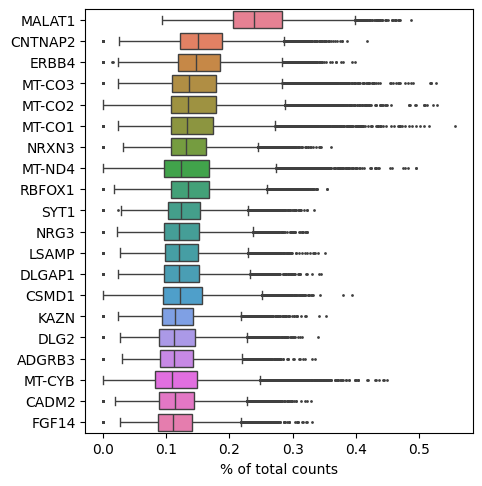

<ipython-input-28-93c0126ba9fc>:9: ImplicitModificationWarning: Trying to modify index of attribute `.var` of view, initializing view as actual.
  bdata.var.index = bdata.var.index.map(lookup)


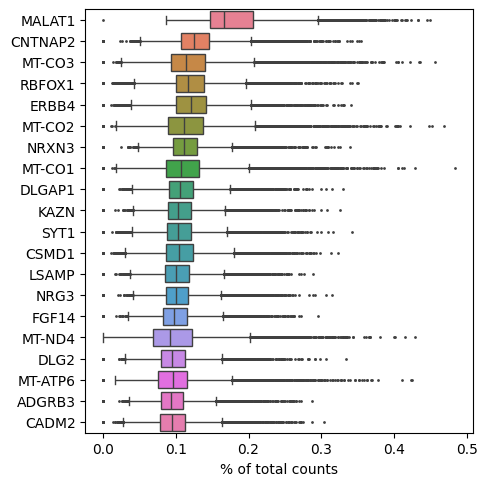

In [ ]:
# this looks interesting!!!


bdata = adata[adata.obs.disease == "Alzheimer disease"]
bdata.var.index = bdata.var.index.map(lookup)
scanpy.pl.highest_expr_genes(bdata,n_top=20)

bdata = adata[adata.obs.disease == "normal"]
bdata.var.index = bdata.var.index.map(lookup)
scanpy.pl.highest_expr_genes(bdata,n_top=20)

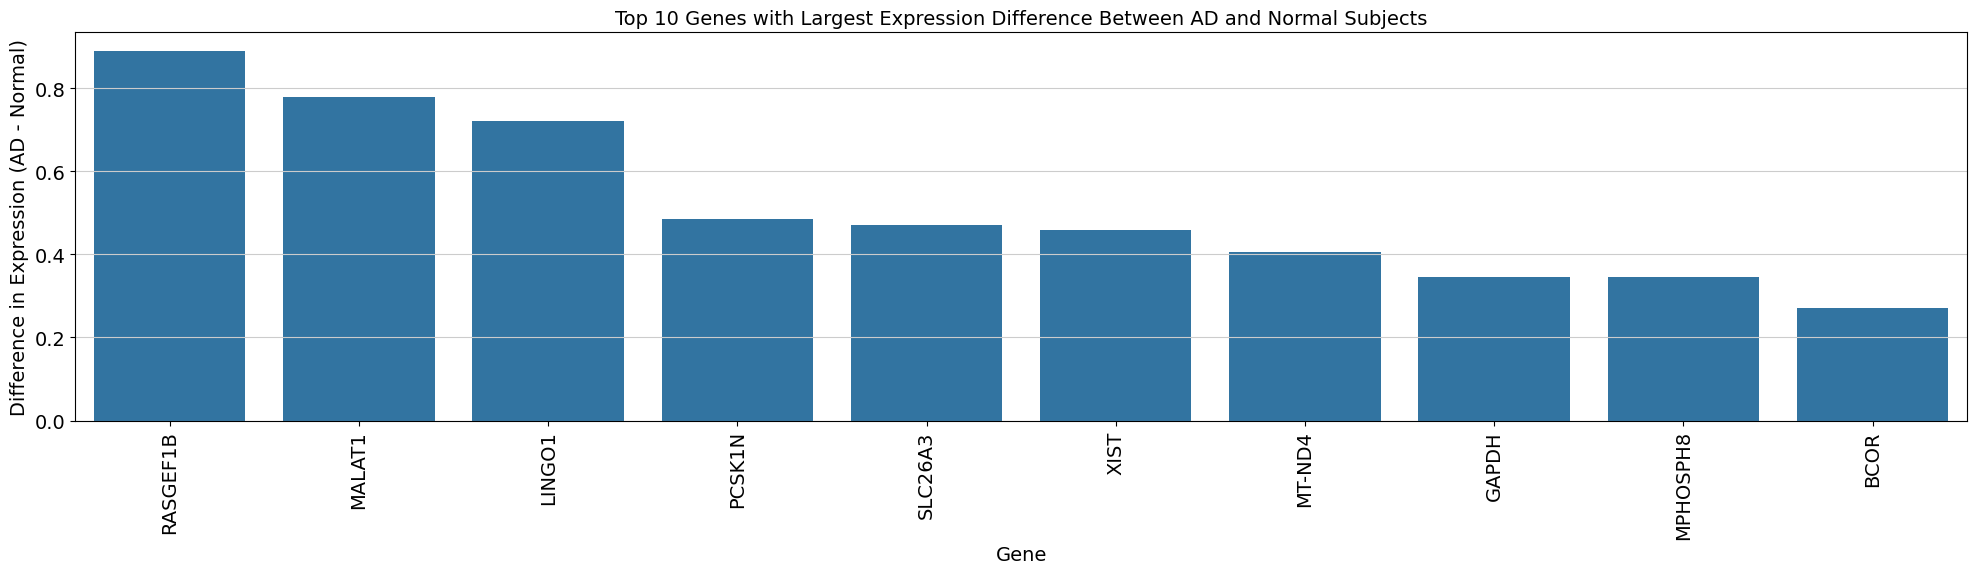

In [ ]:
#Expression difference AD-Normal

# Filter the dataset to focus on subjects categorized by 'sex'
ad_group = adata[adata.obs['disease'] == 'Alzheimer disease']
normal_group = adata[adata.obs['disease'] == 'normal']
ad_counts = ad_group.X.mean(axis=0)
normal_counts = normal_group.X.mean(axis=0)

# Create a DataFrame to store gene expression for easier comparison
genes = adata.var.index.map(lookup)
gene_expression_comparison = pd.DataFrame({
    'Gene': genes,
    'AD': ad_counts.A1 if hasattr(ad_counts, "A1") else ad_counts,
    'Normal': normal_counts.A1 if hasattr(normal_counts, "A1") else normal_counts
})

# Calculate the difference between male and female expression
gene_expression_comparison['Difference'] = gene_expression_comparison['AD'] - gene_expression_comparison['Normal']
gene_expression_comparison_sorted = gene_expression_comparison.sort_values(by='Difference', ascending=False)

# Plot the top 10 genes with the largest difference in expression
top_genes = gene_expression_comparison_sorted.head(10)
plt.figure(figsize=(20, 6))
sns.barplot(x='Gene', y='Difference', data=top_genes)
plt.title('Top 10 Genes with Largest Expression Difference Between AD and Normal Subjects')
plt.xticks(rotation=90)
plt.ylabel('Difference in Expression (AD - Normal)')
plt.tight_layout()
plt.show()

<ipython-input-71-a7937a129874>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata.obs.groupby(['Sample.ID']).count()
<ipython-input-71-a7937a129874>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(["Sample.ID","disease","Cell.Types"]).count()


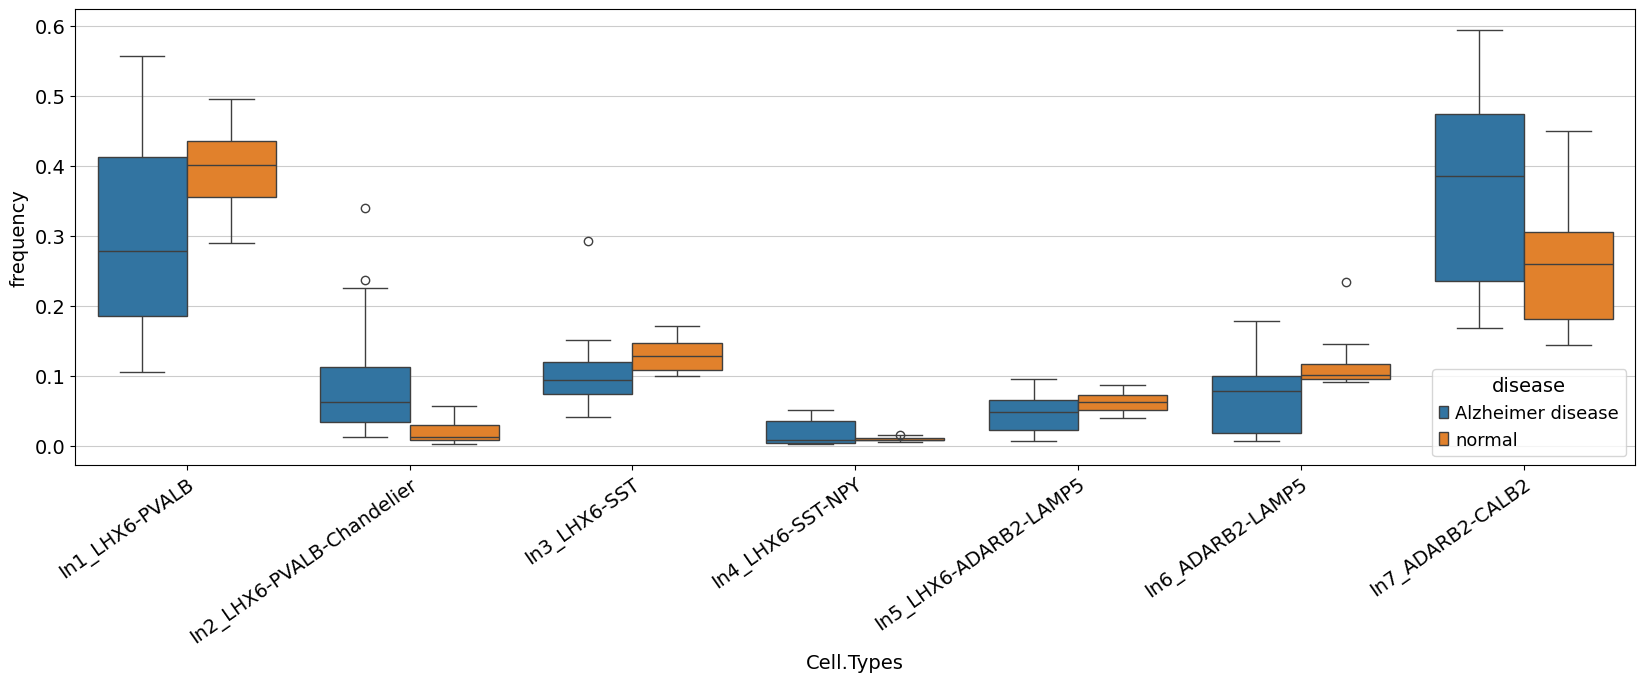

In [ ]:
#Cell frequency by disease
num_tot_cells = adata.obs.groupby(['Sample.ID']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.nCount_RNA))
num_tot_cells

cell_type_counts = adata.obs.groupby(["Sample.ID","disease","Cell.Types"]).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()

cell_type_counts['total_cells'] = cell_type_counts["Sample.ID"].map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.nCount_RNA / cell_type_counts.total_cells

cell_type_counts

plt.figure(figsize = (20,6))

ax = sns.boxplot(data = cell_type_counts, x = 'Cell.Types', y = 'frequency', hue = 'disease')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

#Sex Analysis - Differences between Male-Female

<ipython-input-70-358475cb03a9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata.obs.groupby(['Sample.ID']).count()
<ipython-input-70-358475cb03a9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(["Sample.ID","sex","Cell.Types"]).count()


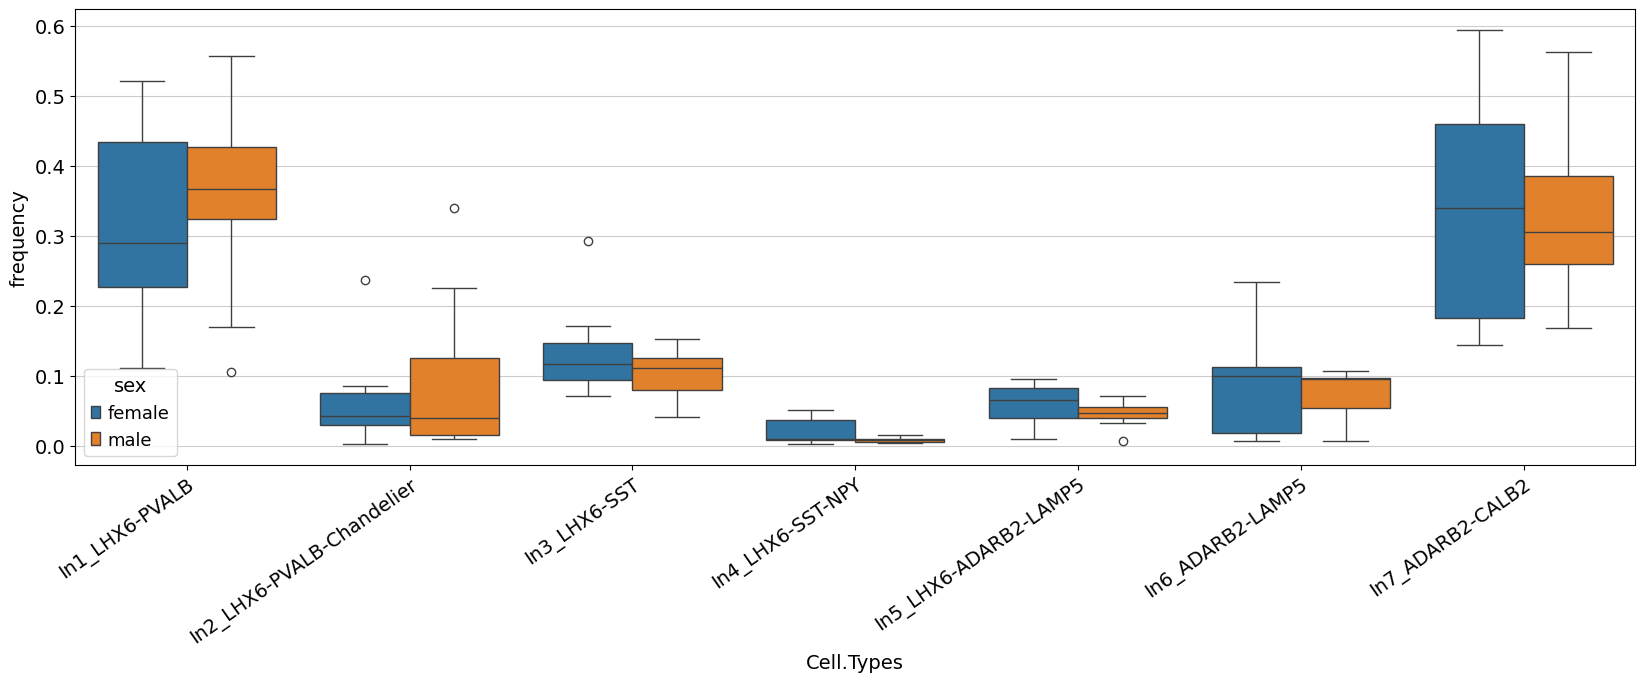

In [ ]:
# Cell Frequency by Gender
num_tot_cells = adata.obs.groupby(['Sample.ID']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.nCount_RNA))
num_tot_cells

cell_type_counts = adata.obs.groupby(["Sample.ID","sex","Cell.Types"]).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()

cell_type_counts['total_cells'] = cell_type_counts["Sample.ID"].map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.nCount_RNA / cell_type_counts.total_cells

cell_type_counts

plt.figure(figsize = (20,6))

ax = sns.boxplot(data = cell_type_counts, x = 'Cell.Types', y = 'frequency', hue = 'sex')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

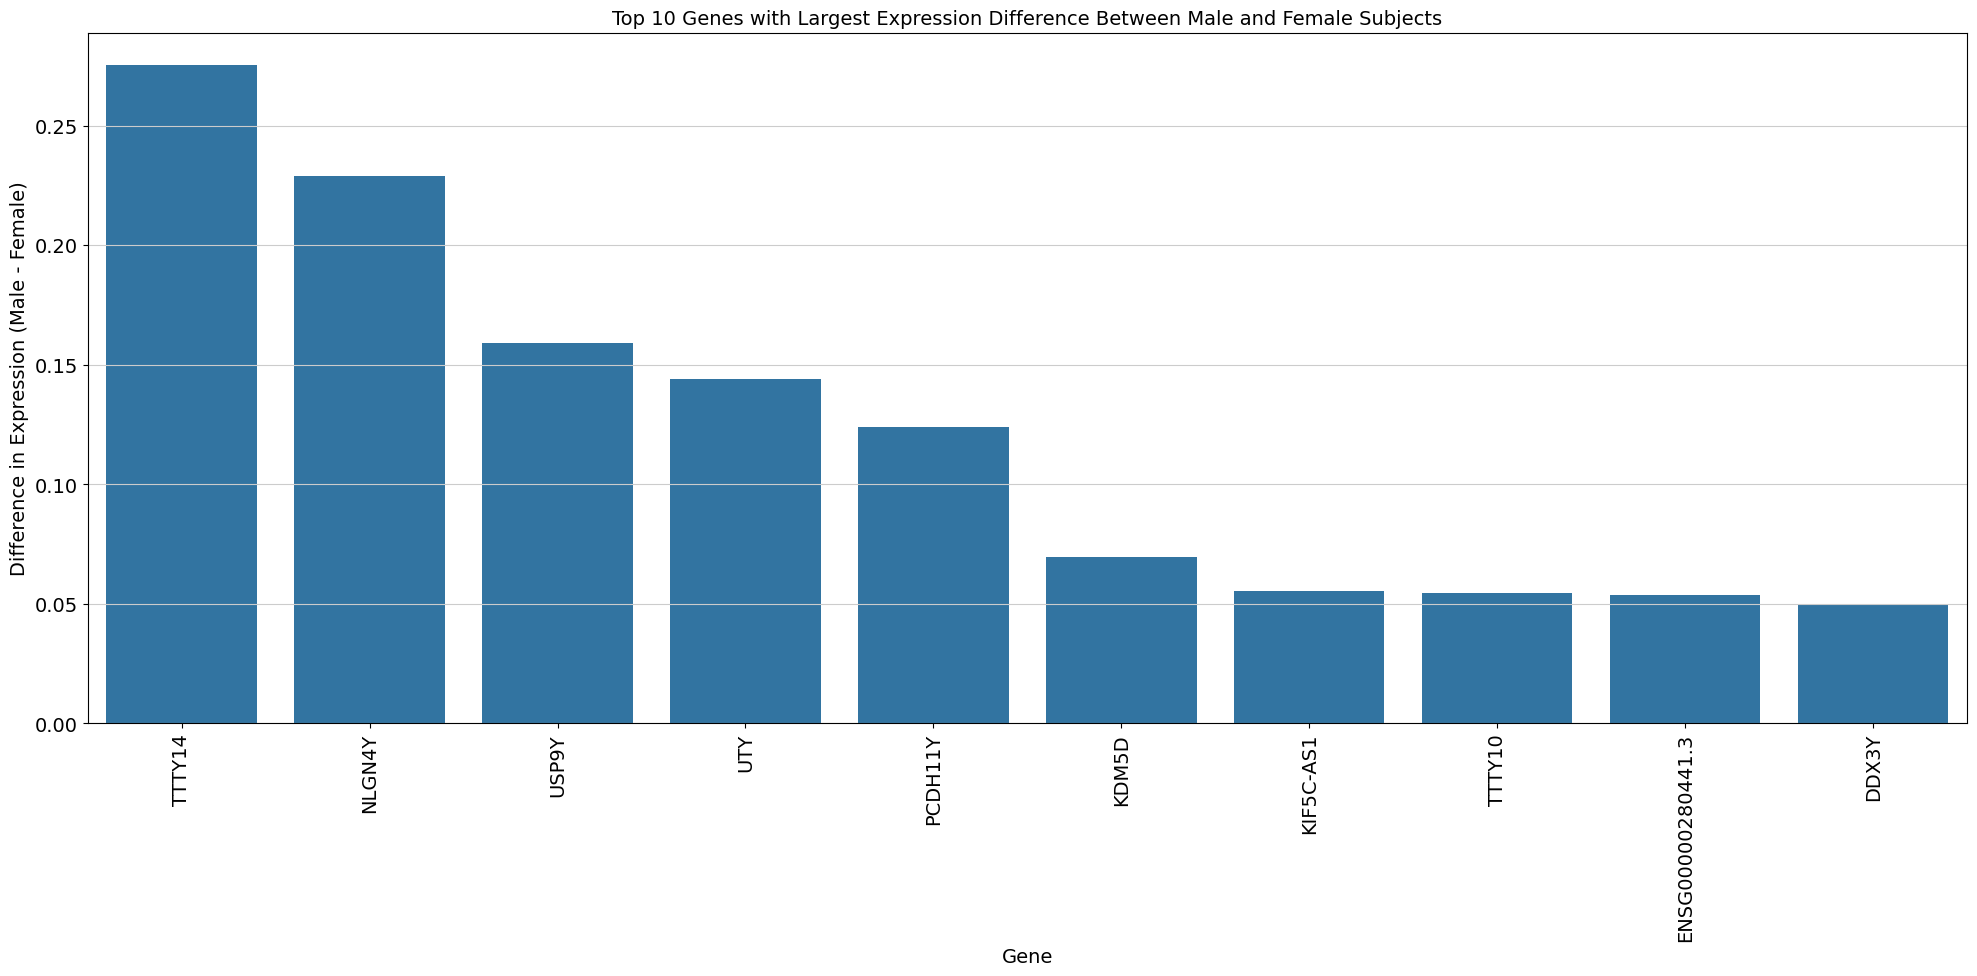

In [ ]:
#Expression difference Male-Female


# Filter the dataset to focus on subjects categorized by 'sex'
male_group = adata[adata.obs['sex'] == 'male']
female_group = adata[adata.obs['sex'] == 'female']
male_counts = male_group.X.mean(axis=0)
female_counts = female_group.X.mean(axis=0)

# Create a DataFrame to store gene expression for easier comparison
genes = adata.var.index.map(lookup)
gene_expression_comparison = pd.DataFrame({
    'Gene': genes,
    'Male': male_counts.A1 if hasattr(male_counts, "A1") else male_counts,
    'Female': female_counts.A1 if hasattr(female_counts, "A1") else female_counts
})

# Calculate the difference between male and female expression
gene_expression_comparison['Difference'] = gene_expression_comparison['Male'] - gene_expression_comparison['Female']
gene_expression_comparison_sorted = gene_expression_comparison.sort_values(by='Difference', ascending=False)

# Plot the top 10 genes with the largest difference in expression
top_genes = gene_expression_comparison_sorted.head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x='Gene', y='Difference', data=top_genes)
plt.title('Top 10 Genes with Largest Expression Difference Between Male and Female Subjects')
plt.xticks(rotation=90)
plt.ylabel('Difference in Expression (Male - Female)')
plt.tight_layout()
plt.show()

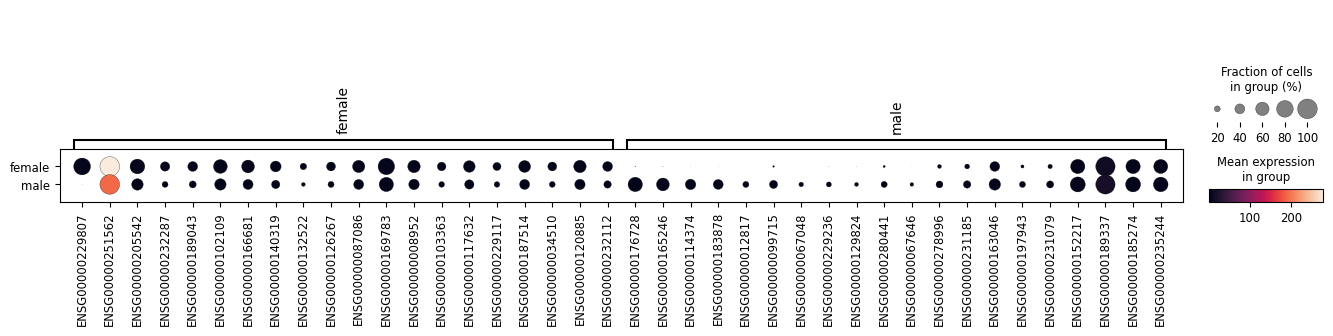

In [41]:
adata = scanpy.read_h5ad("inhibitory.h5ad")

sc.pp.log1p(adata)
adata.var.index = adata.var.index.map(lookup)


#age_lower = adata[adata.obs['age_group'] == "57-68"]
#age_higher = adata[adata.obs['age_group'] == "71-93"]

# Perform differential expression analysis (same method as disease cohort analysis)
sc.tl.rank_genes_groups(adata, groupby='sex', method='t-test',)

# Extract and visualize top age-related genes
sc.pl.rank_genes_groups_dotplot(adata, n_genes=20, cmap='rocket')

In [44]:
lookup["ENSG00000251562"]

'MALAT1'

# Analysis between Ages

In [36]:
# adata = scanpy.read_h5ad("inhibitory.h5ad")
overview = adata.obs.groupby("donor_id").sample(n=1)
overview.sort_values("Age")
# adata.obs['Age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')
# print(overview.Age.min())
# print(overview.Age.max())


<ipython-input-36-68bd95e0ffa1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overview = adata.obs.groupby("donor_id").sample(n=1)


nCount_RNA  nFeature_RNA  percent.mt         SORT  \
C0005_CTCAGAATCCGCAGTG-1      2479.0          1454    2.783380         MAP2   
C0021_AGTGGGAGTCGCATCG-1      4222.0          2453    8.574135  MAP2control   
C0003_ATCATGGGTGTCGCTG-1       895.0           658    4.804469         MAP2   
C0076_GTCGAATAGCACAAAT-1      4095.0          2269    3.150183  MAP2control   
C0027_GACTAACTCACGCGGT-1      1933.0          1226    1.551992  MAP2control   
C0034_CAGATCACACGGACAA-1      5904.0          2974    3.268970  MAP2control   
C0077_GGCAGTCGTATTTCGG-1     13307.0          4379    2.231908  MAP2control   
C0078_GAACTGTTCCGTGTAA-1      3074.0          1499    3.968770  MAP2control   
C0075_TACGTCCTCTTCGTGC-1      7693.0          2822    0.987911  MAP2control   
C0001_AACGTTGTCCTTAATC-1      1814.0          1156    2.590959         MAP2   
C0009_AACCGCGGTTGTTTGG-1      4653.0          2420    0.644745         MAP2   
C0011_GTCGGGTAGGCCGAAT-1      1309.0           814   15.508021         MAP2   
C0007_TAGAGCTAGCCGTCGT-1      3037.0          1863    2.502470         MAP2   
C0028_TTAGGCATCCTTGGTC-1      2412.0          1369    0.000000  MAP2control   
C0016_CCATGTCTCGCTTAGA-1      2086.0          1332    2.684564          AT8   
C0013_TTTGCGCGTAGAGCTG-1      3080.0          1694    3.603896         MAP2   

                          Amyloid  Age  RIN  nCount_SCT  nFeature_SCT  \
C0005_CTCAGAATCCGCAGTG-1       C3   57  6.8      2563.0          1454   
C0021_AGTGGGAGTCGCATCG-1       No   61  6.5      3898.0          2452   
C0003_ATCATGGGTGTCGCTG-1       C3   62  6.6      2131.0           766   
C0076_GTCGAATAGCACAAAT-1       No   66  7.1      6119.0          2304   
C0027_GACTAACTCACGCGGT-1  DP (C0)   67  7.8      2611.0          1227   
C0034_CAGATCACACGGACAA-1       No   67  6.6      4101.0          2854   
C0077_GGCAGTCGTATTTCGG-1       No   68  6.8      7911.0          3958   
C0078_GAACTGTTCCGTGTAA-1       No   71  6.5      6421.0          1670   
C0075_TACGTCCTCTTCGTGC-1       No   72  6.4      7366.0          2821   
C0001_AACGTTGTCCTTAATC-1       C3   73  5.7      2295.0          1156   
C0009_AACCGCGGTTGTTTGG-1       C3   79    7      3467.0          2363   
C0011_GTCGGGTAGGCCGAAT-1       C3   81  6.5      2556.0           829   
C0007_TAGAGCTAGCCGTCGT-1       C3   81  6.1      2998.0          1862   
C0028_TTAGGCATCCTTGGTC-1       No   87  7.5      2801.0          1367   
C0016_CCATGTCTCGCTTAGA-1       C3   89  6.5      2348.0          1331   
C0013_TTTGCGCGTAGAGCTG-1       C3   93  6.5      2993.0          1694   

                          nCount_Exon  ...               cell_type      assay  \
C0005_CTCAGAATCCGCAGTG-1       1190.0  ...  inhibitory interneuron  10x 3' v2   
C0021_AGTGGGAGTCGCATCG-1       3503.0  ...  inhibitory interneuron  10x 3' v2   
C0003_ATCATGGGTGTCGCTG-1        379.0  ...  inhibitory interneuron  10x 3' v2   
C0076_GTCGAATAGCACAAAT-1       1888.0  ...  inhibitory interneuron  10x 3' v3   
C0027_GACTAACTCACGCGGT-1        976.0  ...  inhibitory interneuron  10x 3' v2   
C0034_CAGATCACACGGACAA-1       4336.0  ...  inhibitory interneuron  10x 3' v2   
C0077_GGCAGTCGTATTTCGG-1       3043.0  ...  inhibitory interneuron  10x 3' v3   
C0078_GAACTGTTCCGTGTAA-1        683.0  ...  inhibitory interneuron  10x 3' v3   
C0075_TACGTCCTCTTCGTGC-1       1446.0  ...  inhibitory interneuron  10x 3' v3   
C0001_AACGTTGTCCTTAATC-1        778.0  ...  inhibitory interneuron  10x 3' v2   
C0009_AACCGCGGTTGTTTGG-1       1819.0  ...  inhibitory interneuron  10x 3' v2   
C0011_GTCGGGTAGGCCGAAT-1        773.0  ...  inhibitory interneuron  10x 3' v2   
C0007_TAGAGCTAGCCGTCGT-1       1583.0  ...  inhibitory interneuron  10x 3' v2   
C0028_TTAGGCATCCTTGGTC-1        781.0  ...  inhibitory interneuron  10x 3' v2   
C0016_CCATGTCTCGCTTAGA-1       1043.0  ...  inhibitory interneuron  10x 3' v2   
C0013_TTTGCGCGTAGAGCTG-1       2030.0  ...  inhibitory interneuron  10x 3' v2   

                                    disease      organism     

In [ ]:
adata.var

feature_is_filtered       feature_name feature_reference  \
ENSG00000278915.1                False  ENSG00000278915.1    NCBITaxon:9606   
TXNDC2                           False             TXNDC2    NCBITaxon:9606   
NDUFA9                           False             NDUFA9    NCBITaxon:9606   
ENSG00000229177.1                False  ENSG00000229177.1    NCBITaxon:9606   
C6orf136                         False           C6orf136    NCBITaxon:9606   
...                                ...                ...               ...   
CCDC12                           False             CCDC12    NCBITaxon:9606   
ENSG00000272264.1                False  ENSG00000272264.1    NCBITaxon:9606   
RUVBL1                           False             RUVBL1    NCBITaxon:9606   
DIP2B                            False              DIP2B    NCBITaxon:9606   
CPSF3                            False              CPSF3    NCBITaxon:9606   

                  feature_biotype feature_length  
ENSG00000278915.1            gene            577  
TXNDC2                       gene           3352  
NDUFA9                       gene          10391  
ENSG00000229177.1            gene            327  
C6orf136                     gene           2118  
...                           ...            ...  
CCDC12                       gene           4754  
ENSG00000272264.1            gene            577  
RUVBL1                       gene           6998  
DIP2B                        gene          10351  
CPSF3                        gene           3686  

[33091 rows x 5 columns]

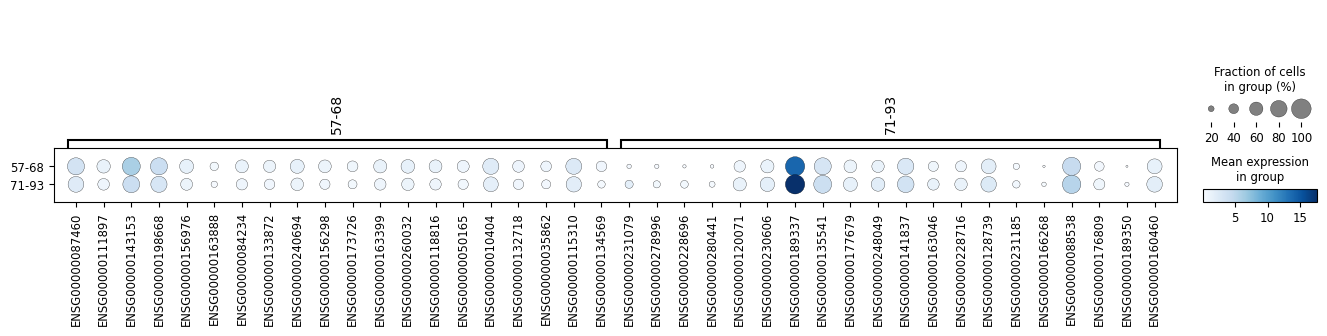

In [39]:
adata = scanpy.read_h5ad("inhibitory.h5ad")

sc.pp.log1p(adata)
adata.var.index = adata.var.index.map(lookup)
adata.obs['Age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')

adata.obs['age_group'] = pd.cut(adata.obs['Age'], bins=[57, 69, 89], labels=["57-68", "71-93"])

#age_lower = adata[adata.obs['age_group'] == "57-68"]
#age_higher = adata[adata.obs['age_group'] == "71-93"]

# Perform differential expression analysis (same method as disease cohort analysis)
sc.tl.rank_genes_groups(adata, groupby='age_group', method='t-test',)

# Extract and visualize top age-related genes
sc.pl.rank_genes_groups_dotplot(adata, n_genes=20, cmap='Blues')
#
#

In [40]:
 lookup["ENSG00000189337"]

'KAZN'

# Attempt at Complete single-cell RNAseq analysis

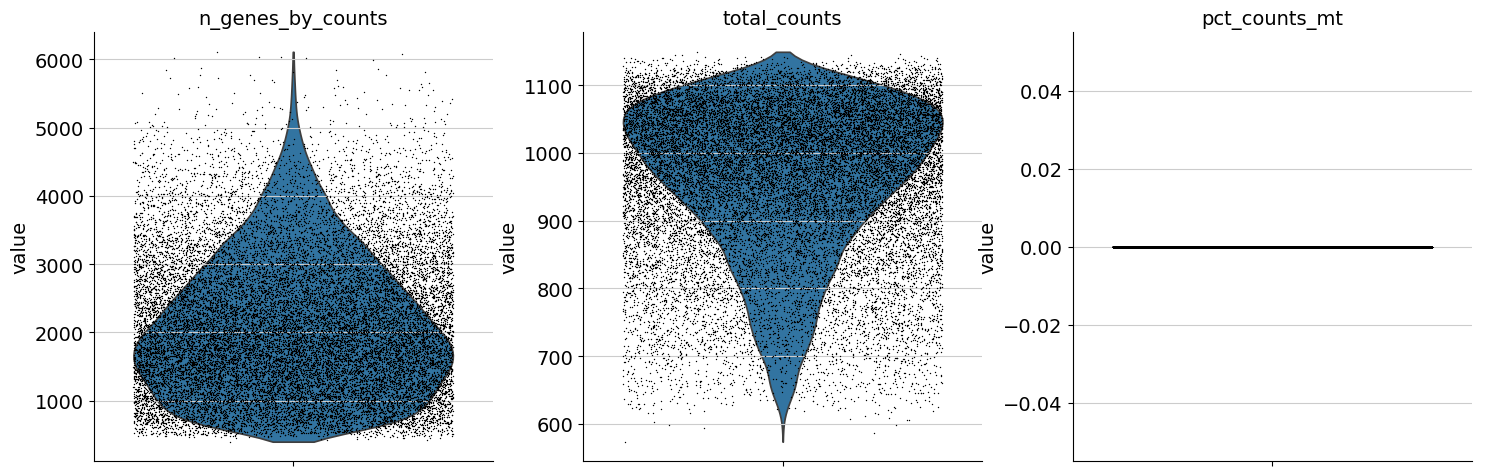

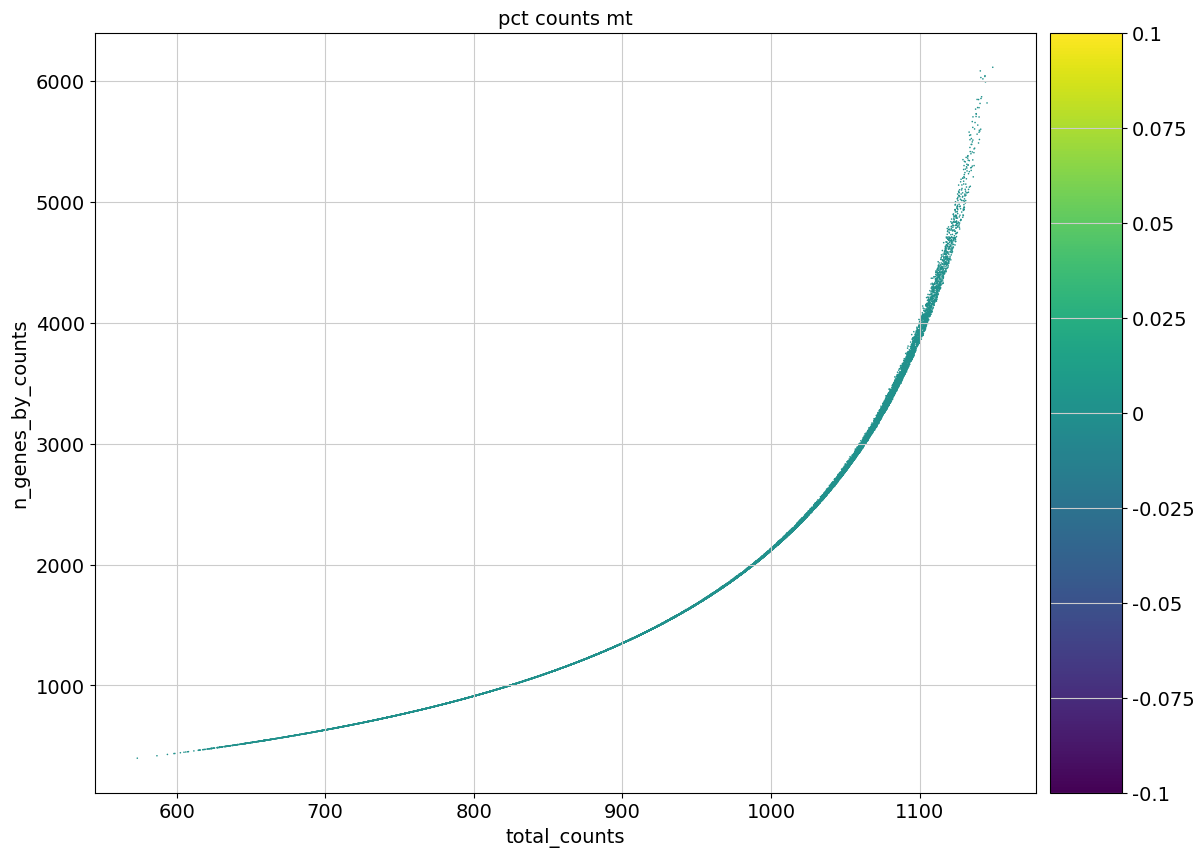

ValueError: n_components=30 must be between 1 and min(n_samples, n_features)=27 with svd_solver='arpack'

In [ ]:
import scanpy as sc
sc.settings.set_figure_params(dpi=50, facecolor="white", figsize=(10, 10))

sc.pp.filter_cells(bdata, min_genes=200)
sc.pp.filter_genes(bdata, min_cells=3)

# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.scrublet(adata, batch_key="Sample.ID")


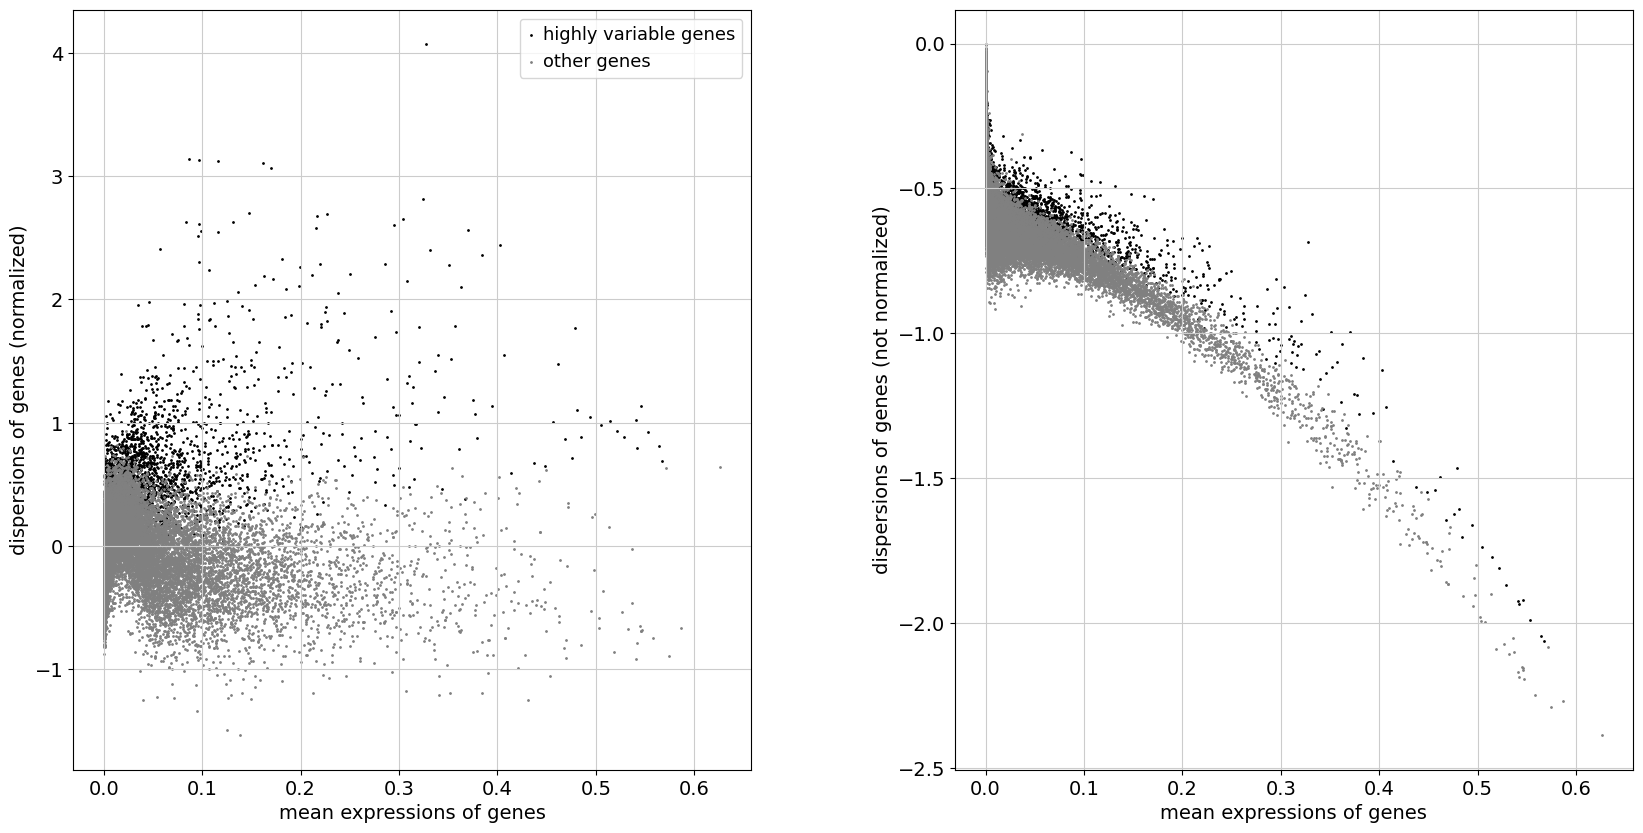

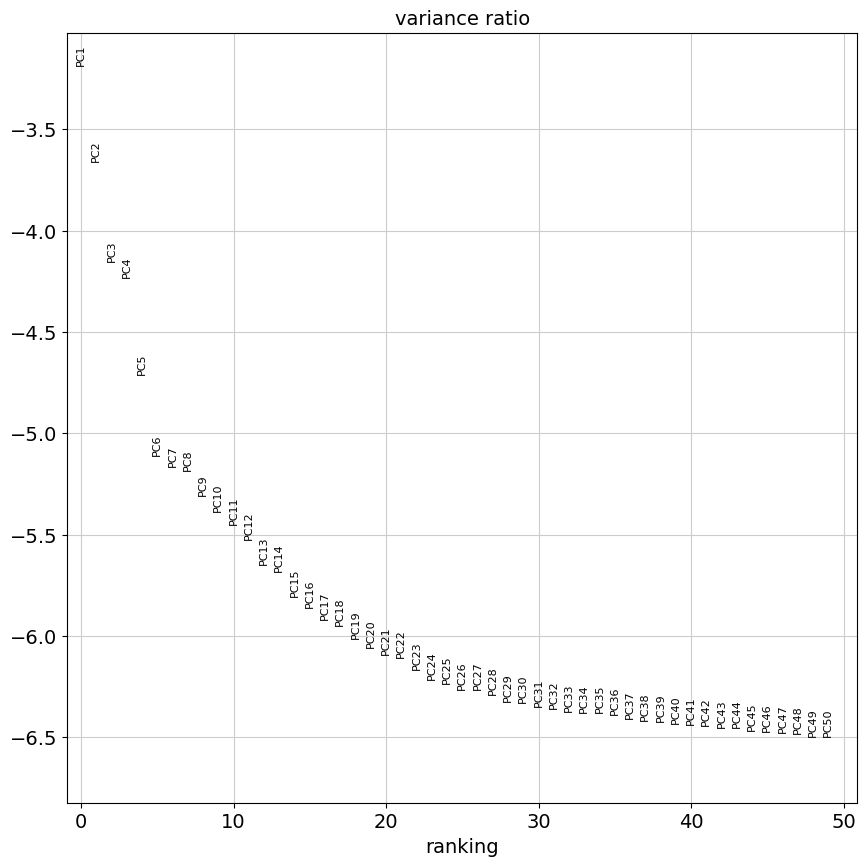

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", figsize=(10, 10))

# Saving count data
adata.layers["counts"] = adata.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="Sample.ID")

sc.pl.highly_variable_genes(adata)

sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)


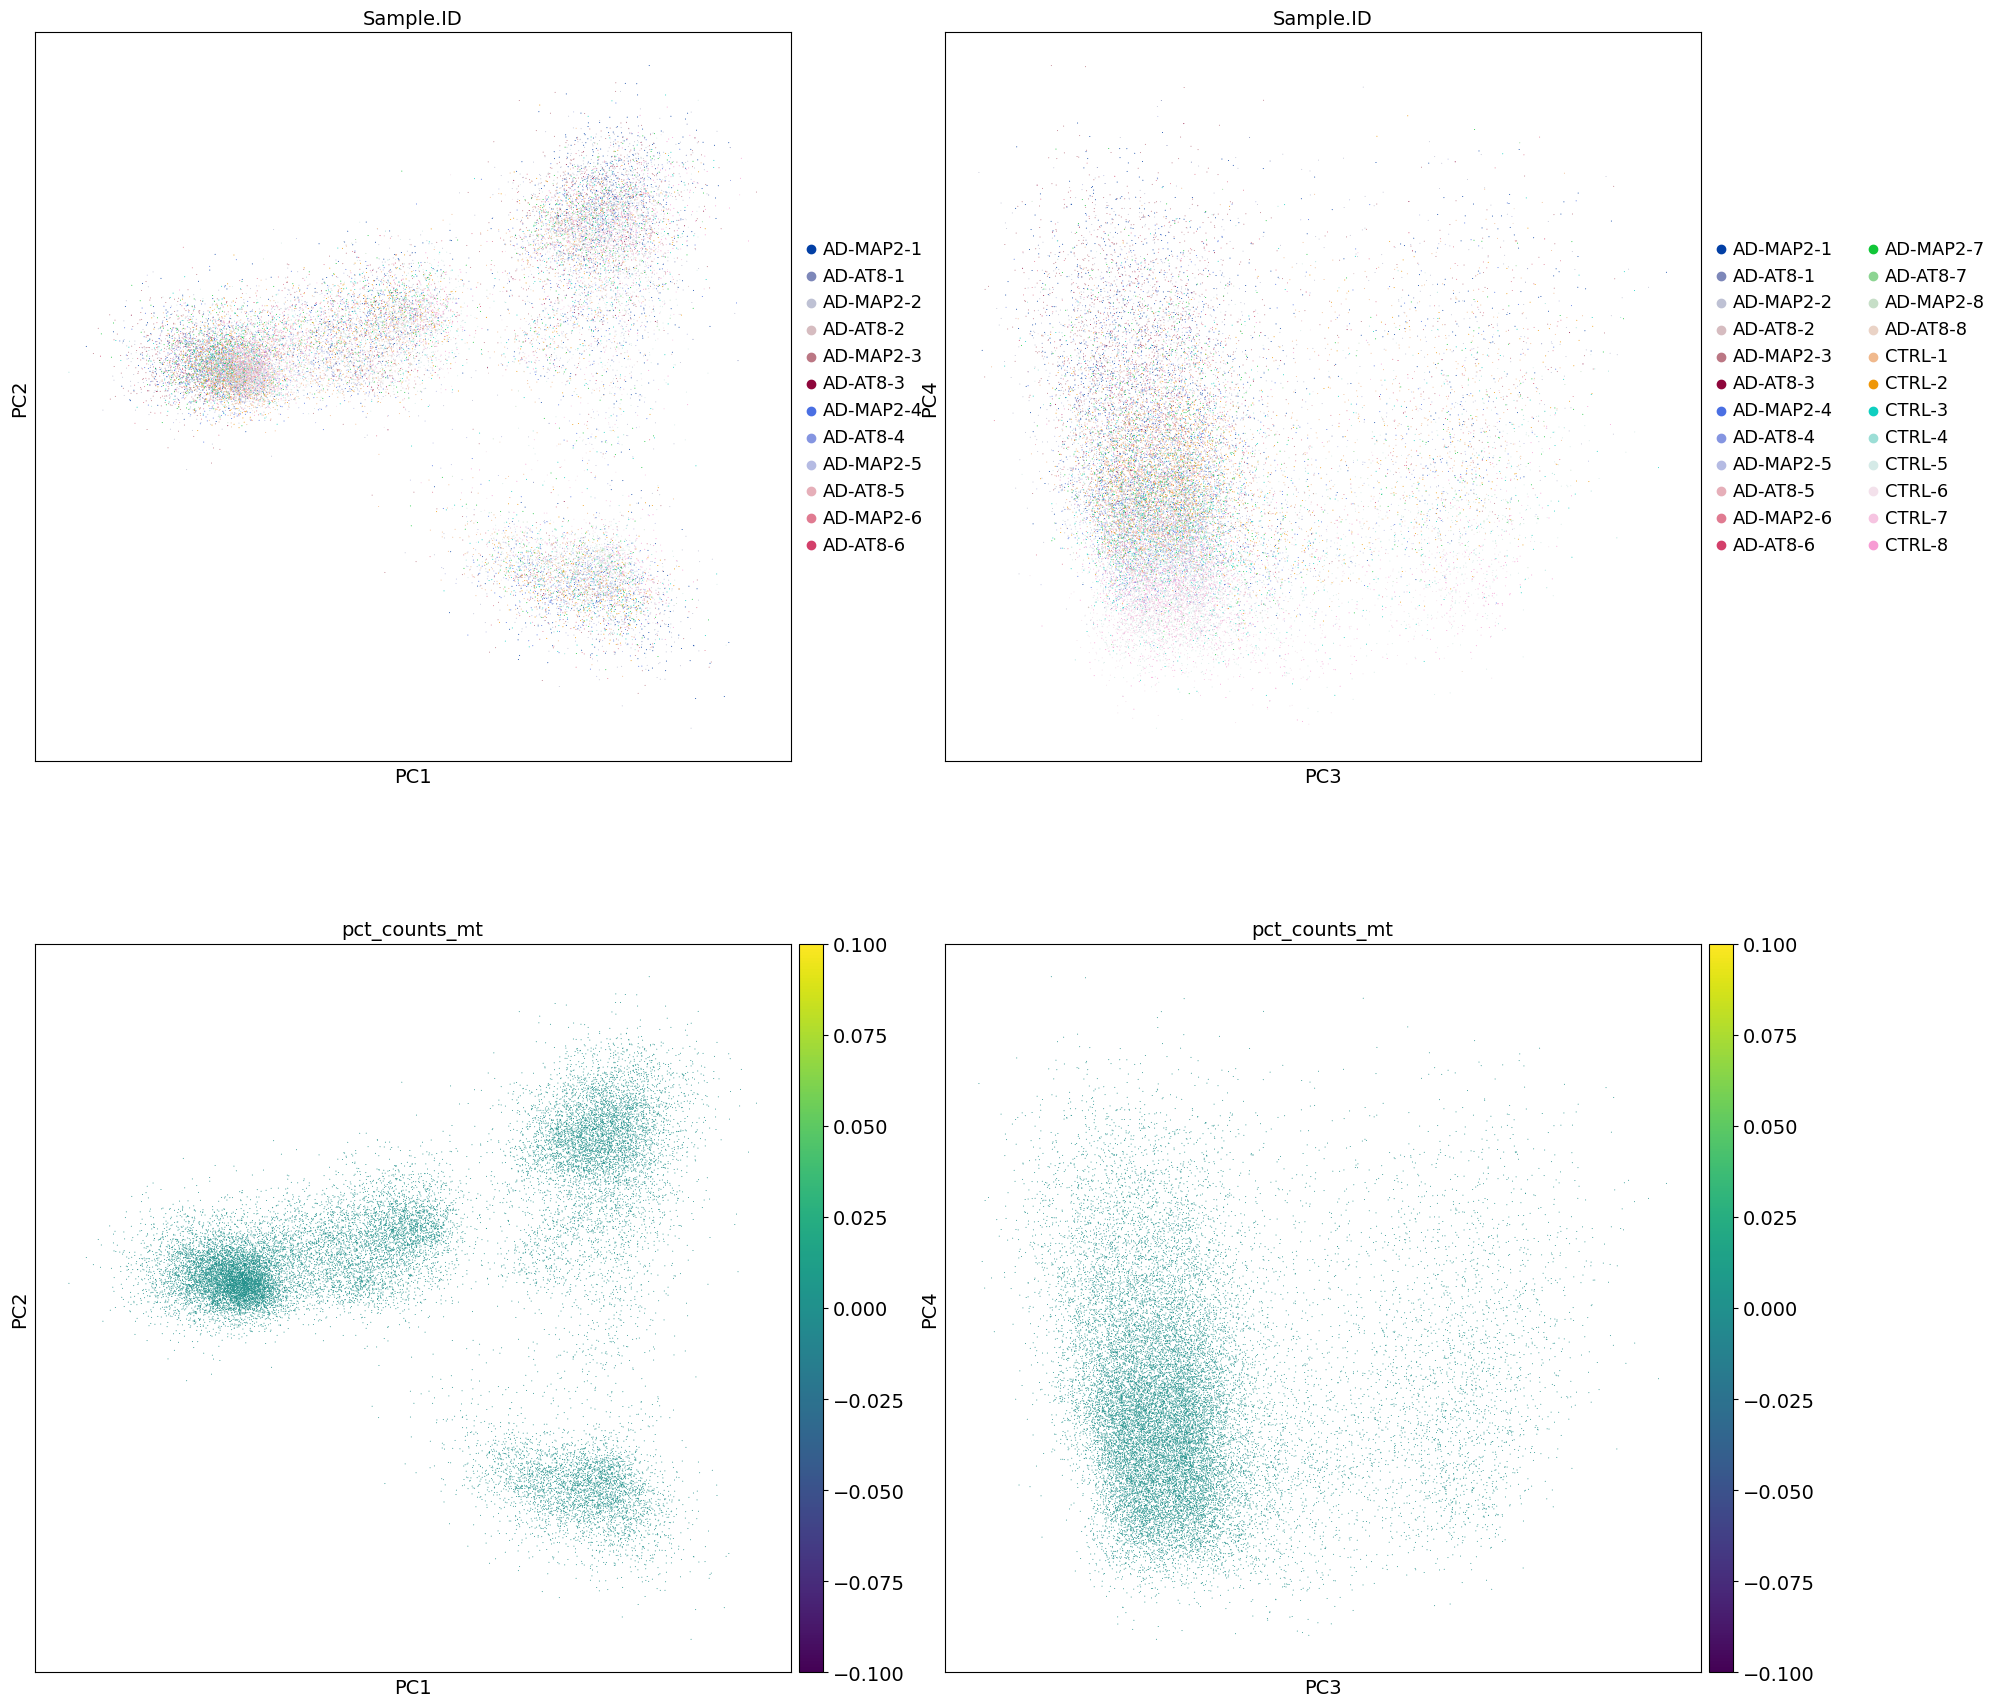

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", figsize=(10, 10))


sc.pl.pca(
    adata,
    color=["Sample.ID", "Sample.ID", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

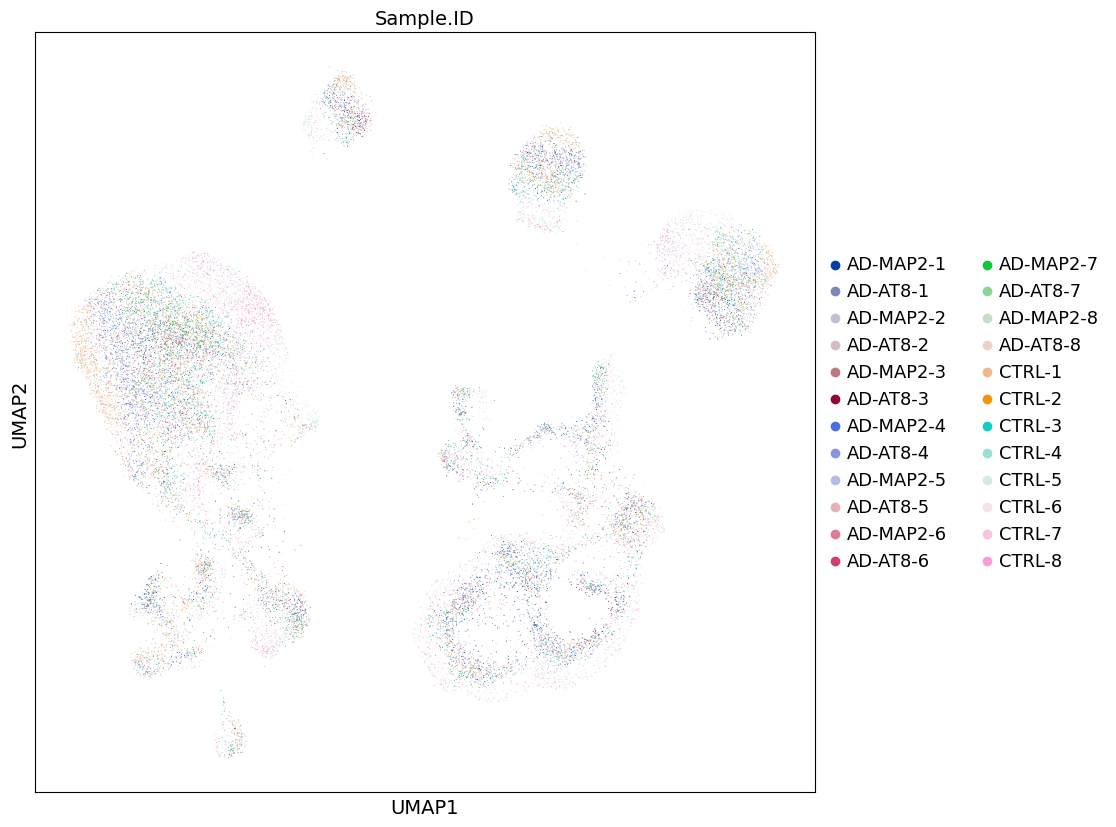

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color="Sample.ID",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

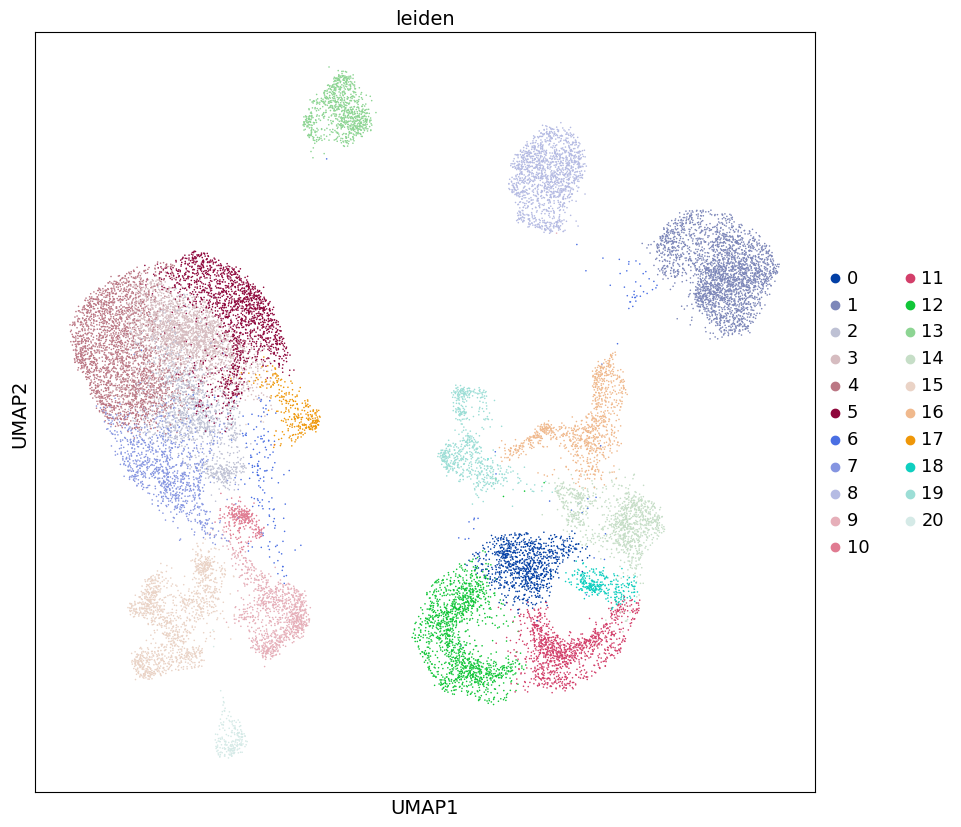

In [ ]:
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
sc.pl.umap(adata, color=["leiden"])
